# Analyzing Video Game Sales, by Andy Qu and Evan Song

## Why analyze Video Game Sales?

What makes a popular video game? Publicity? Is it the genre? ESRB rating? Platform? Developer, critic evaluation, country of development or year created? Or a combination of these?

Analyzing video game sales attempts to find properties of Video Games that affect sales. The most popular games are oftentimes published by big publishers like Nintendo and EA, however every now and then an indie/solo title published by a small company breaks the charts. If the publicity and advertising of a famous publisher isn't the only variable in a games success, then what is it that makes games popular? 

This tutorial will walk through our thought processes in data analysis and how we approach analyzing the dataset to discover the "secret" of a successful video game.

## Gathering Data

We used data from Kaggle, where others have not only accumulated but built upon and updated a dataset of video game sales over time.

Video Game Sales Data: https://www.kaggle.com/ashaheedq/video-games-sales-2019

Video Game Country/Region Data: https://www.kaggle.com/andreshg/videogamescompaniesregions

The libraries used throughout this tutorial:
- Pandas: Used to organize and clean data
- Matplotlib: Used to display data
- Seaborn: Used to display data
- Numpy: Used to further calculate and display data
- SKLearn: Used to further analyze data using machine learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;

df = pd.read_csv('vgsales-12-4-2019.csv')
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [2]:
region_df = pd.read_csv("video-games-developers.csv")
region_df.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [3]:
df = pd.merge(df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')

# Drop Sales information for Regions as they will not be used in the analysis.
# However, keeps Global_Sales for as it is one of the two columns representing a games total sales.
df = df.drop(['Developer_y','NA_Sales','PAL_Sales','JP_Sales','Other_Sales'], axis=1)
df.columns = ['Rank','Name','Genre','ESRB_Rating','Platform','Publisher','Developer',
              'Critic_Score','User_Score','Total_Shipped','Global_Sales','Year','Country']
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,Year,Country
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,2006.0,Japan
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,1985.0,Japan
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,2008.0,Japan
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,2017.0,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,2009.0,Japan


After merging the two datasets and dropping extra columns, these are the remaining columns used in our Exploratory Data Analysis.

Description of columns
- Rank - Games ranked by sales
- Name - Name of the game
- Genre - Genre of the game
- ESRB_Rating - ESRB Rating of game
- Platform - Platform of the game
- Publisher - Publisher of Game
- Developer - Developer of Game
- Critic_Score - Critic Score of the game out of 10
- User_Score - User Score of the game out of 10
- Total_Shipped - Total game sales (in millions)
- Global_Sales - Total game sales  (in millions)
- Year - Year game published
- Country - Country of Publisher

## Data Cleaning/Exploratory Data Analysis

The dataset stores each games total sales information in two columns, Total_Shipped and Global_Sales. The purpose for these is that the columns that don't have regional sales data (i.e. NA, JP, PAL, Other) have their total sales number stored in Total_Shipped. Because we won't be using regional sales data in the analysis, the two values are consolidated into one column called "Total_Sales".

New column:
- Total_Sales - Stores the total sales of "Total_Shipped" and "Global_Sales" in one column.

In [4]:
# Because sales are either listed under "Total_Shipped" or "Global_Sales", 
# Total_Sales will keep the total value in one column. Records by Millions.
# Then removes games with no sales data whatsoever.
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]
df = df.drop(['Total_Shipped','Global_Sales',], axis=1)
df = df.sort_values(by=['Total_Sales'])

df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales
19861,19862,NadePro!! Kisama no Seiyuu Yatte Miro!,Adventure,NaN,PS2,GungHo,GungHo Works,NaN,NaN,2009.0,NaN,0.01
18940,18941,Rugby World Cup 2015,Sports,NaN,PC,Big Ben Interactive,HB Studios,NaN,NaN,2015.0,NaN,0.01
18941,18942,Heart no Kuni no Alice,Adventure,NaN,PSP,Prototype,Prototype,NaN,NaN,2009.0,NaN,0.01
18942,18943,Petz: Hamsterz Life 2,Misc,E,GBA,Ubisoft,Jorudan,NaN,NaN,2007.0,Europe,0.01
18943,18944,San-X: Chara Sagashi Land,Action,NaN,DS,MTO,MTO,NaN,NaN,2007.0,Japan,0.01


## ESRB and Genre vs Sales
The first type of data we wanted to explore were the individual effects of ESRB Rating and Genre on Sales.

In [5]:
# ESRB Rating DataFrame, removes NaN rows
ESRB_df = df.dropna(subset=['ESRB_Rating'])
ESRB_df = ESRB_df[ESRB_df.Name != 'Wii Sports']

In [6]:
X = ESRB_df['Genre']
X2 = ESRB_df['ESRB_Rating']
Y = ESRB_df['Total_Sales']

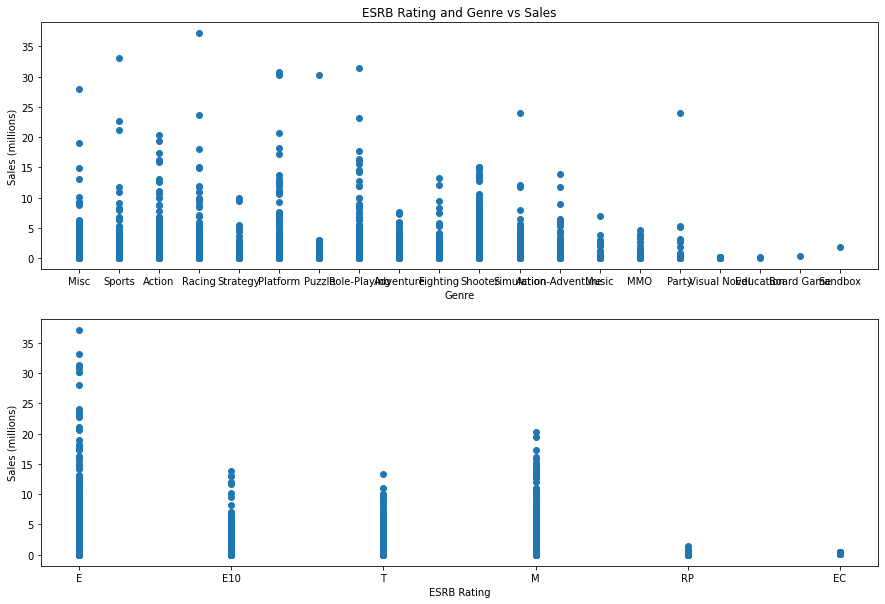

In [7]:
fig, axes = plt.subplots(2, figsize=(15, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("ESRB Rating and Genre vs Sales")
ax1.set_ylabel("Sales (millions)")
ax1.set_xlabel("Genre")
ax2.set_ylabel("Sales (millions)")
ax2.set_xlabel("ESRB Rating")
ax1.scatter(X, Y)
ax2.scatter(X2, Y)

Because the points on the scatter plot are so grouped, it's hard to tell much from the data. We decided to use a violin plot to represent the same information except with data-point density also shown below.

<AxesSubplot:xlabel='ESRB_Rating', ylabel='Total_Sales'>

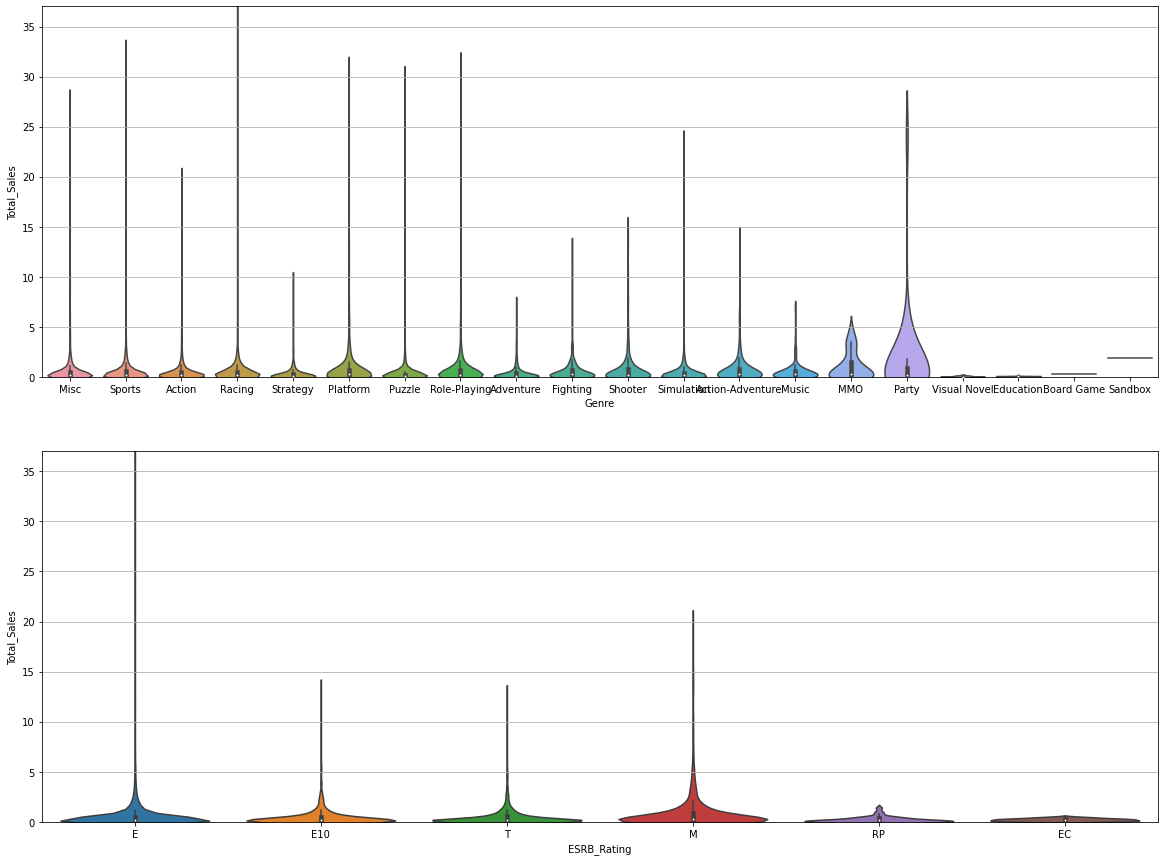

In [8]:
fig, axes = plt.subplots(2, figsize=(20, 15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.grid()
ax2.grid()
ax1.set_ylim(0, 37)
ax2.set_ylim(0, 37)
sns.violinplot(x='Genre', y='Total_Sales', data=ESRB_df, ax=ax1, scale='width')
sns.violinplot(x='ESRB_Rating', y='Total_Sales', data=ESRB_df, ax=ax2, scale='width')

It's hard to tell any specific ordering or correlation from both the ESRB_Rating and Genre categories, however we decided to move ahead with Genre for now as it looked more promising in showing independent non-fluid categories that could independently influence sales.

## Genre Totals

Further expanding into Genre, we wanted to be able to see which of the genres was the most popular. A new column 'Genre_Totals' was created by totaling the sales of each genre. This information could be used later as a feature in later analysis.

New Column:
- Genre_Totals: Total sales per genre

In [9]:
df["Genre_Totals"] = df.groupby(["Genre"])["Total_Sales"].transform(sum)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Genre_Totals
19861,19862,NadePro!! Kisama no Seiyuu Yatte Miro!,Adventure,NaN,PS2,GungHo,GungHo Works,NaN,NaN,2009.0,NaN,0.01,505.82
18940,18941,Rugby World Cup 2015,Sports,NaN,PC,Big Ben Interactive,HB Studios,NaN,NaN,2015.0,NaN,0.01,1464.10
18941,18942,Heart no Kuni no Alice,Adventure,NaN,PSP,Prototype,Prototype,NaN,NaN,2009.0,NaN,0.01,505.82
18942,18943,Petz: Hamsterz Life 2,Misc,E,GBA,Ubisoft,Jorudan,NaN,NaN,2007.0,Europe,0.01,904.29
18943,18944,San-X: Chara Sagashi Land,Action,NaN,DS,MTO,MTO,NaN,NaN,2007.0,Japan,0.01,1496.12


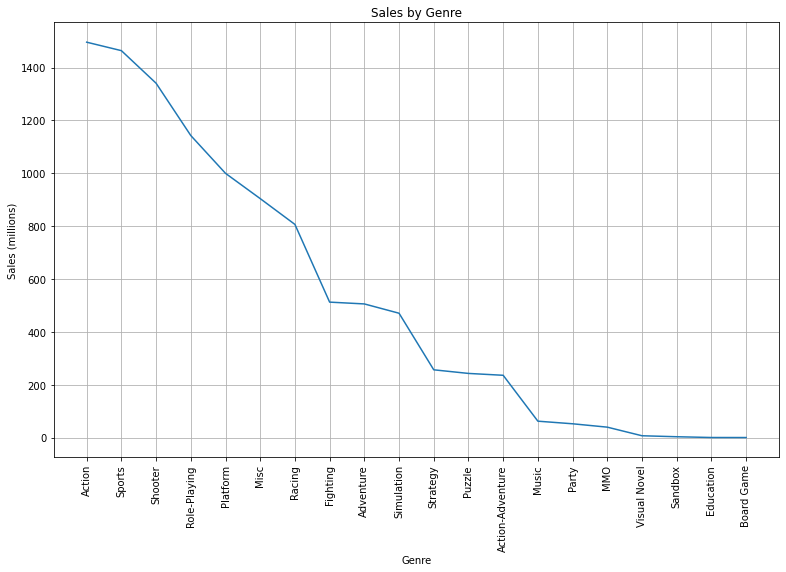

In [10]:
genre_df = df.sort_values(by=['Genre_Totals'], ascending=False)
X = genre_df['Genre']
Y = genre_df['Genre_Totals']

plt.figure(figsize=(15,8))
plt.title("Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (millions)")
plt.grid()
plt.xticks(rotation='vertical')
plt.plot(X, Y)

## Year vs Sales

For a fluid and continuous correlation, we graphed the progression of sales over time in scatter and violin plots.

Included in the scatter plot is a regression line that uses color to indicate the slope - Green line for positive slope, red for negative slope.

Text(0.5, 1.0, 'Violin Sales by Year')

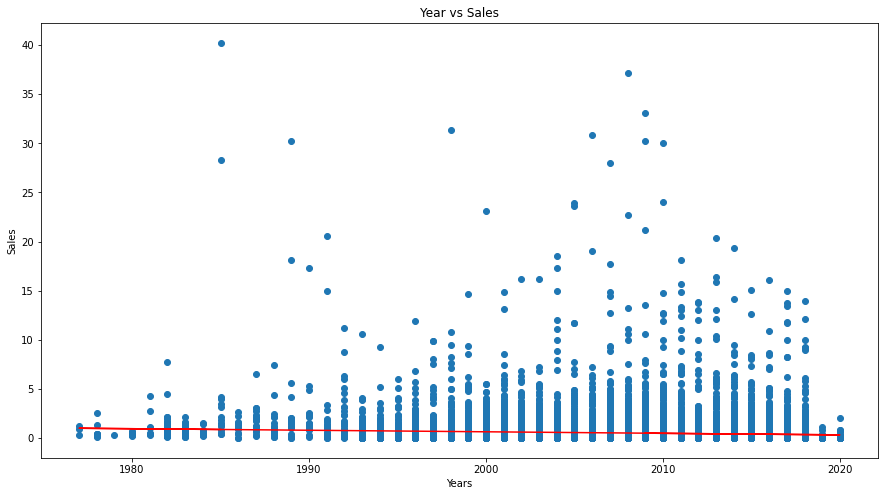

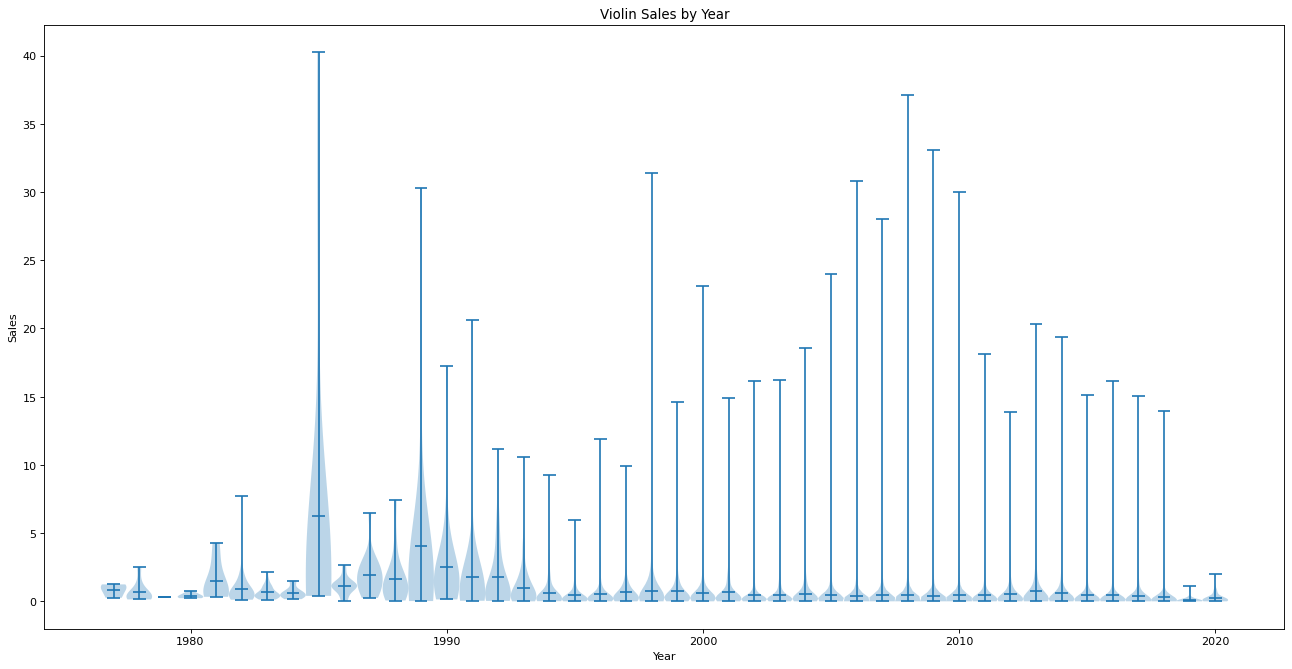

In [11]:
year_df = df.dropna(subset=['Year'])
year_df = year_df[year_df.Name != 'Wii Sports']
year_df = year_df[year_df.Publisher != 'PUBG Corporation']
year_df = year_df[year_df.Year != 1970]

X = year_df['Year']
Y = year_df['Total_Sales']
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X, Y)
m, b = np.polyfit(X, Y, 1) 
c = "r"
if (m>0):
    c = "g"
plt.plot(X, m*X + b, color=c)

year_list = year_df.Year.unique()
violin_exp = []

for i in year_list:
    violin_exp.append(year_df[year_df['Year'] == i]['Total_Sales'].to_numpy())

plt.figure(figsize=(20, 10), dpi=80)
plt.violinplot(violin_exp, year_list, widths=1, showmeans=True) 
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Violin Sales by Year")

## Sales per Country

Analysis of year showed a negative correlation between sales and year. In order to further analyze the correlation, we decided to also analyze sales by the country column to see if a games country of development had any impact upon the games sales.

New Column:
- Country_Sales: Total sales per country

In [12]:
country_df = df.dropna(subset=['Country'])
country_df["Country_Sales"] = country_df.groupby(["Country"])["Total_Sales"].transform(sum)
country_df = country_df.sort_values(by=['Country_Sales', 'Total_Sales'], ascending=False)
country_df = country_df[country_df['Name'] != "Wii Sports"]
country_df.head()

<ipython-input-12-893066664cd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df["Country_Sales"] = country_df.groupby(["Country"])["Total_Sales"].transform(sum)


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Genre_Totals,Country_Sales
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,NaN,2013.0,United States,20.32,1496.12,4568.15
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,2014.0,United States,19.39,1496.12,4568.15
26,27,Grand Theft Auto: San Andreas,Action,M,PS2,Rockstar Games,Rockstar North,9.5,NaN,2004.0,United States,17.30,1496.12,4568.15
30,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,NaN,2002.0,United States,16.15,1496.12,4568.15
32,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,2013.0,United States,15.86,1496.12,4568.15


Text(0.5, 1.0, 'Violin Sales by Country')

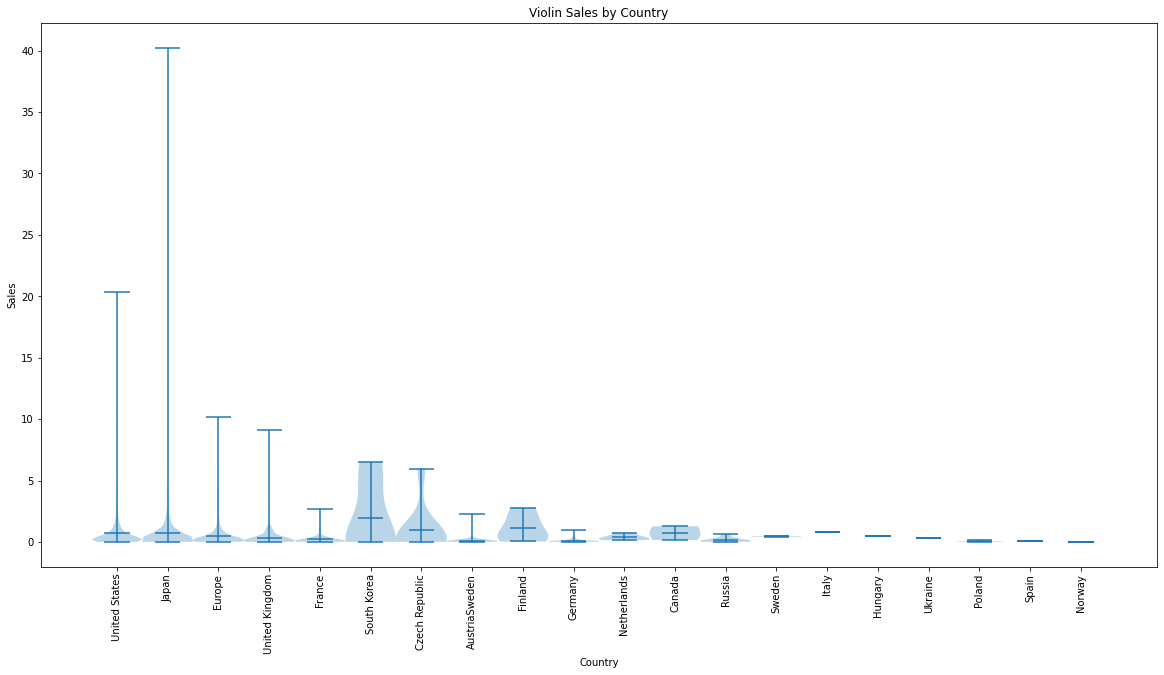

In [13]:
country_list = country_df.Country.unique()
violin_country = []

for i in country_list:
    violin_country.append(country_df[country_df['Country'] == i]['Total_Sales'].to_numpy())
    
country_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(country_pos) 
ax.set_xticklabels(country_list, rotation='vertical')
plt.violinplot(violin_country, country_pos, widths=1, showmeans=True) 
ax.set_xlabel("Country")
ax.set_ylabel("Sales")
ax.set_title("Violin Sales by Country")

## Sales per Platform by Year
This is important to view because what if overall negative correlation of sales over time is because certain platforms are more negative than others? Are there any platforms with a positive correlation of sales over time?

Below I show the 10 most popular consoles, and then further explore if they could have a positive sales over time.

New Columns:
- Platform_Sales: Total sales per platform

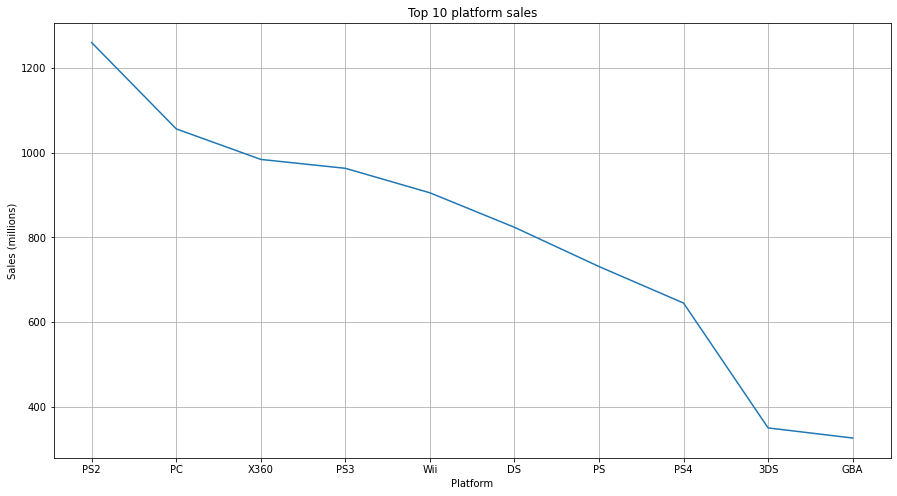

In [14]:
df["Platform_Sales"] = df.groupby(["Platform"])["Total_Sales"].transform(sum)
platform_df = df[['Platform', 'Platform_Sales']].drop_duplicates().sort_values(by=['Platform_Sales'], ascending=False)

top_platforms = platform_df.head(10)['Platform'].tolist()
plt.figure(figsize=(15,8))
plt.title("Top 10 platform sales")
plt.ylabel("Sales (millions)")
plt.xlabel("Platform")
plt.grid()
plt.plot(platform_df.head(10)['Platform'], platform_df.head(10)['Platform_Sales'])

## Displaying the sales of the top 10 game platforms over time
As we can see, all the platforms have either a negative sales line over time or constant. This could simply be because the consoles are old, the PS2 was released in 2000 after all. Because it's only natural that game sales for such an old console would fall off over time, what about a newer console like the Nintendo Switch?

In [15]:
year_plat_df = df.sort_values(by=['Total_Sales'], ascending=False)
year_plat_df.dropna(subset=['Year'], inplace=True)
year_plat_df = year_plat_df[year_plat_df['Year'] != 1970]
year_plat_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Genre_Totals,Platform_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86,1464.10,905.10
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24,999.94,256.34
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14,806.64,905.10
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60,1340.85,1055.82
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09,1464.10,905.10


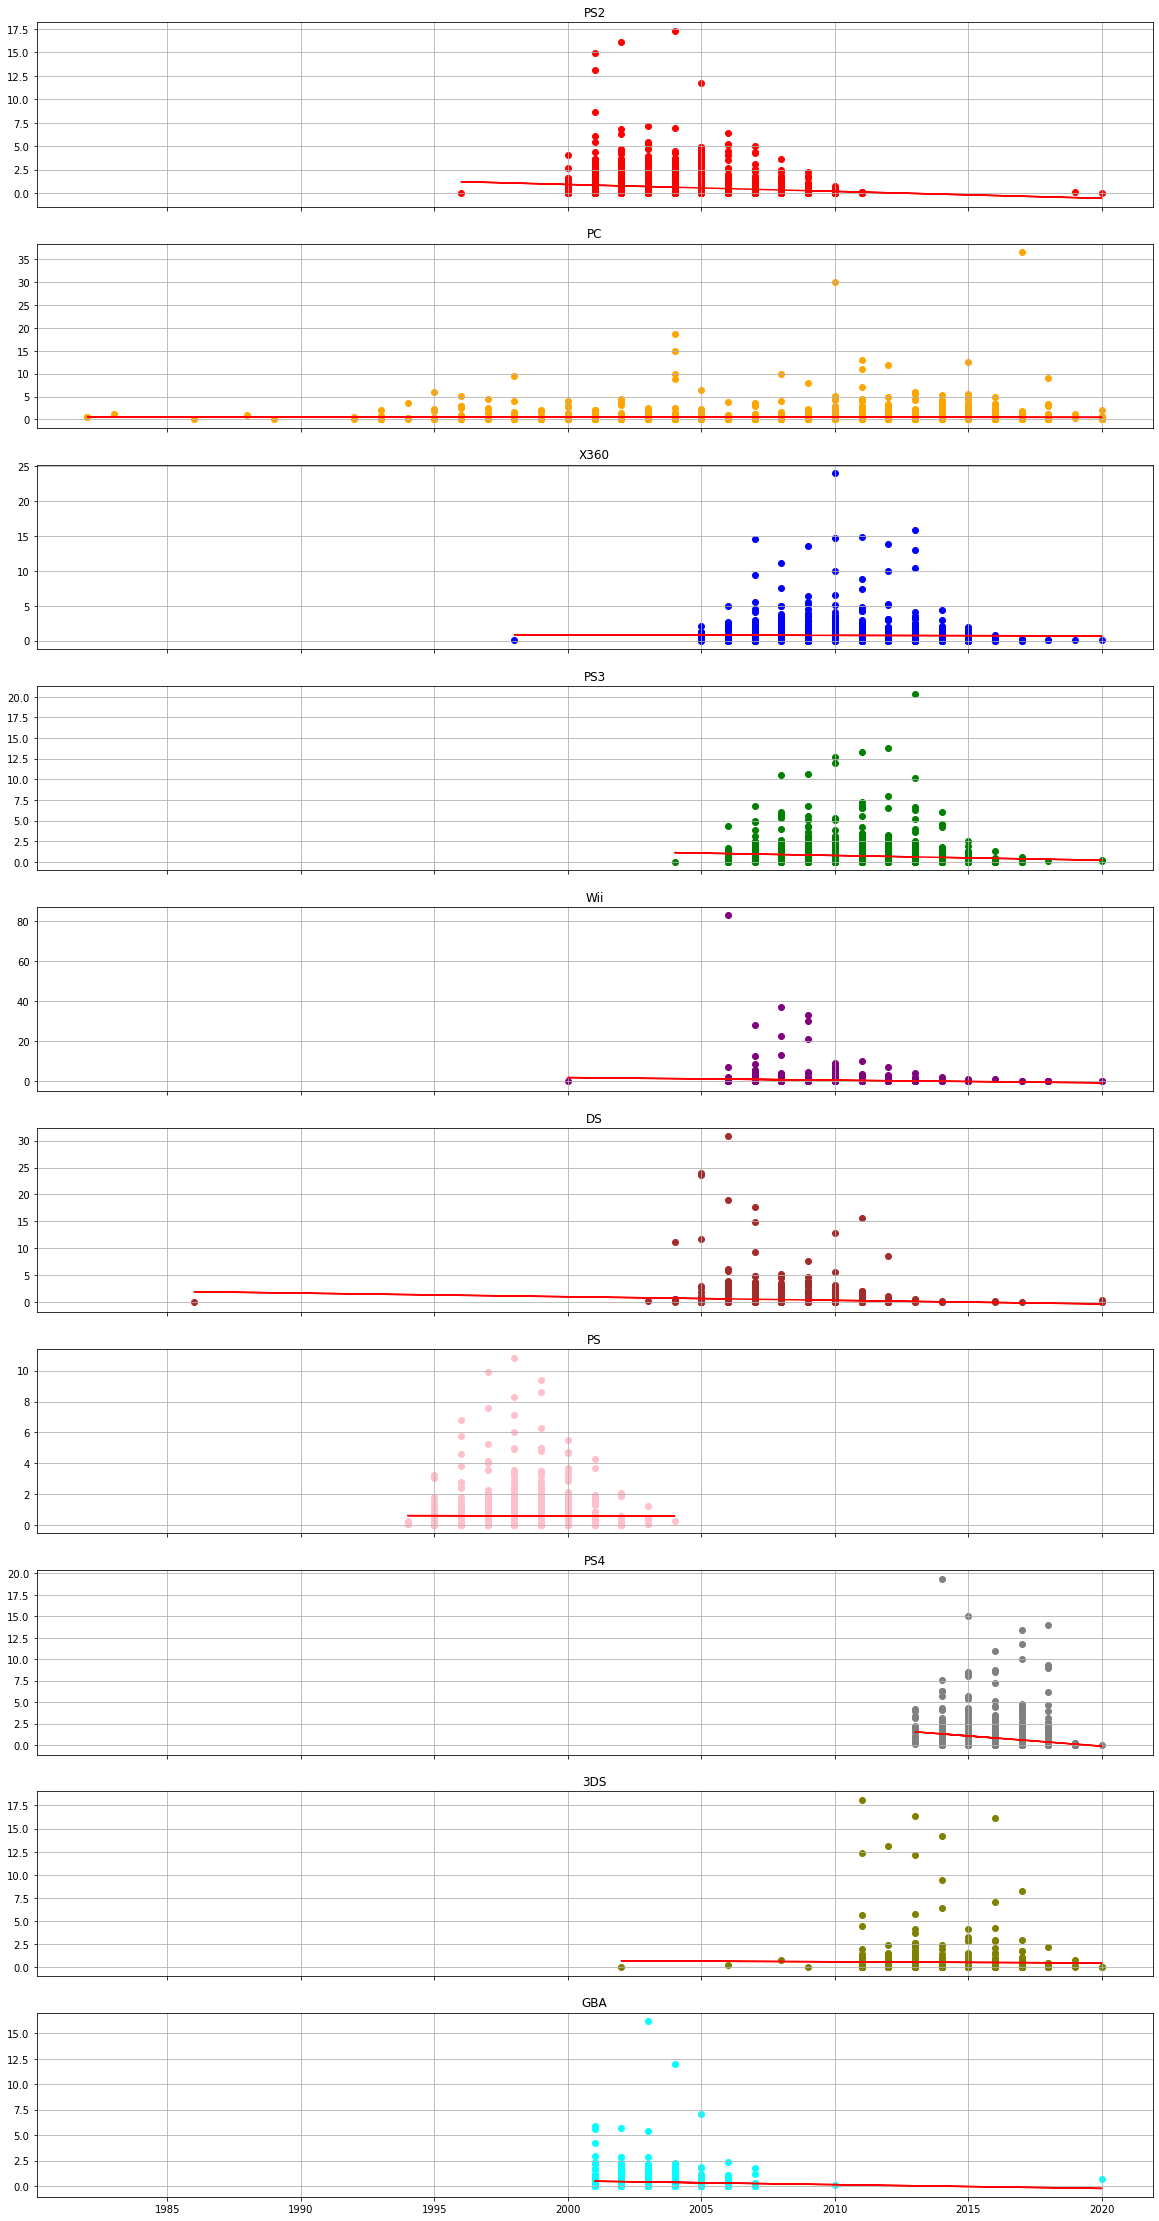

In [16]:
fig, ax = plt.subplots(10, figsize=(20, 40), sharex = True) 
colors = ['red', 'orange', 'blue', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(len(top_platforms)):
    x = year_plat_df[year_plat_df['Platform'] == top_platforms[i]]['Year']
    y = year_plat_df[year_plat_df['Platform'] == top_platforms[i]]['Total_Sales'].to_numpy() 
    ax[i].scatter(x, y).set_color(colors[i])
    ax[i].set_title(top_platforms[i])
    ax[i].grid()
    
    m, b = np.polyfit(x, y, 1) 
    c = "r"
    if (m>0):
        c = "g"
    ax[i].plot(x, m*x + b, color=c)

## Nintendo Switch sales analysis
As shown, even a newer console like the switch has sales that fall off after the first year.

Slope: -0.5194187575528996


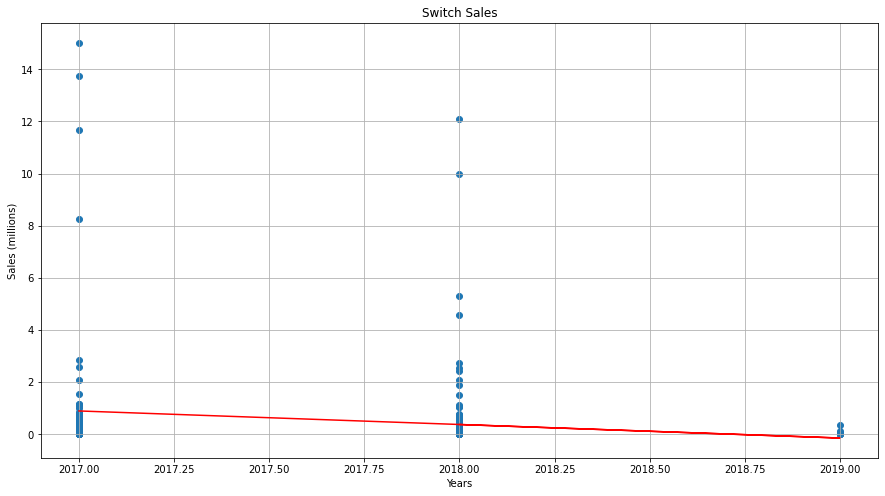

In [17]:
plt.figure(figsize=(15,8))
x = year_plat_df[year_plat_df['Platform'] == 'NS']['Year']
y = year_plat_df[year_plat_df['Platform'] == 'NS']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('Switch Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"
if (m>0):
    c = "g"
plt.plot(x, m*x + b, color=c)
print("Slope:",m)

## New consoles are released regularly, but what about PC?
I assume from looking at the data that console excitement falls off fast with each new release - soon after Switch came PS5 and XBox Series X. However, PC is a constant that remains throughout the years and only improves over time. Do PC sales grow or remain constant over time?

As shown below even PC has a negative slope, though much smaller than the Switch.

This PC graph is shown above, but is emphasized again here in more detail.

Slope: -0.003257327117634603
Intercept: 7.041380501658156


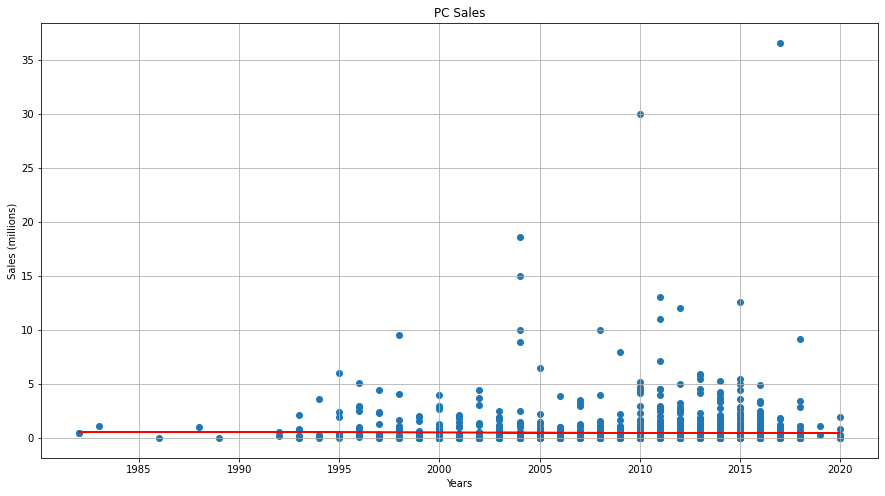

In [18]:
plt.figure(figsize=(15,8))
x = year_plat_df[year_plat_df['Platform'] == 'PC']['Year']
y = year_plat_df[year_plat_df['Platform'] == 'PC']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('PC Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"
if (m>0):
    c = "g"
  
plt.plot(x, m*x + b, color=c)
print("Slope:", m)
print("Intercept:", b)

# FOR ANDY, CLEANED DATASET
I simply cleaned df, so you can use df for your cleaned data needs.

In [19]:
df = df.dropna(subset=['Year','ESRB_Rating','Country','Genre','Total_Sales'])
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Country,Total_Sales,Genre_Totals,Platform_Sales
18942,18943,Petz: Hamsterz Life 2,Misc,E,GBA,Ubisoft,Jorudan,NaN,NaN,2007.0,Europe,0.01,904.29,326.64
18953,18954,Juiced 2: Hot Import Nights,Racing,T,PC,THQ,Juice Games,NaN,NaN,2008.0,United States,0.01,806.64,1055.82
18920,18921,Super Bubble Pop,Puzzle,E,XB,Jaleco,Runecraft,NaN,NaN,2002.0,Japan,0.01,242.87,258.49
18958,18959,Teenage Mutant Ninja Turtles (3DS),Action,E10,3DS,Activision,Magic Pockets,NaN,NaN,2013.0,United States,0.01,1496.12,350.53
18989,18990,The Cages: Pro Style Batting Practice,Sports,E,Wii,Konami,Konami,NaN,NaN,2010.0,Japan,0.01,1464.10,905.10


### *FOR EVAN SONG BELOW!!!!!!!!* 📈📊

Genre


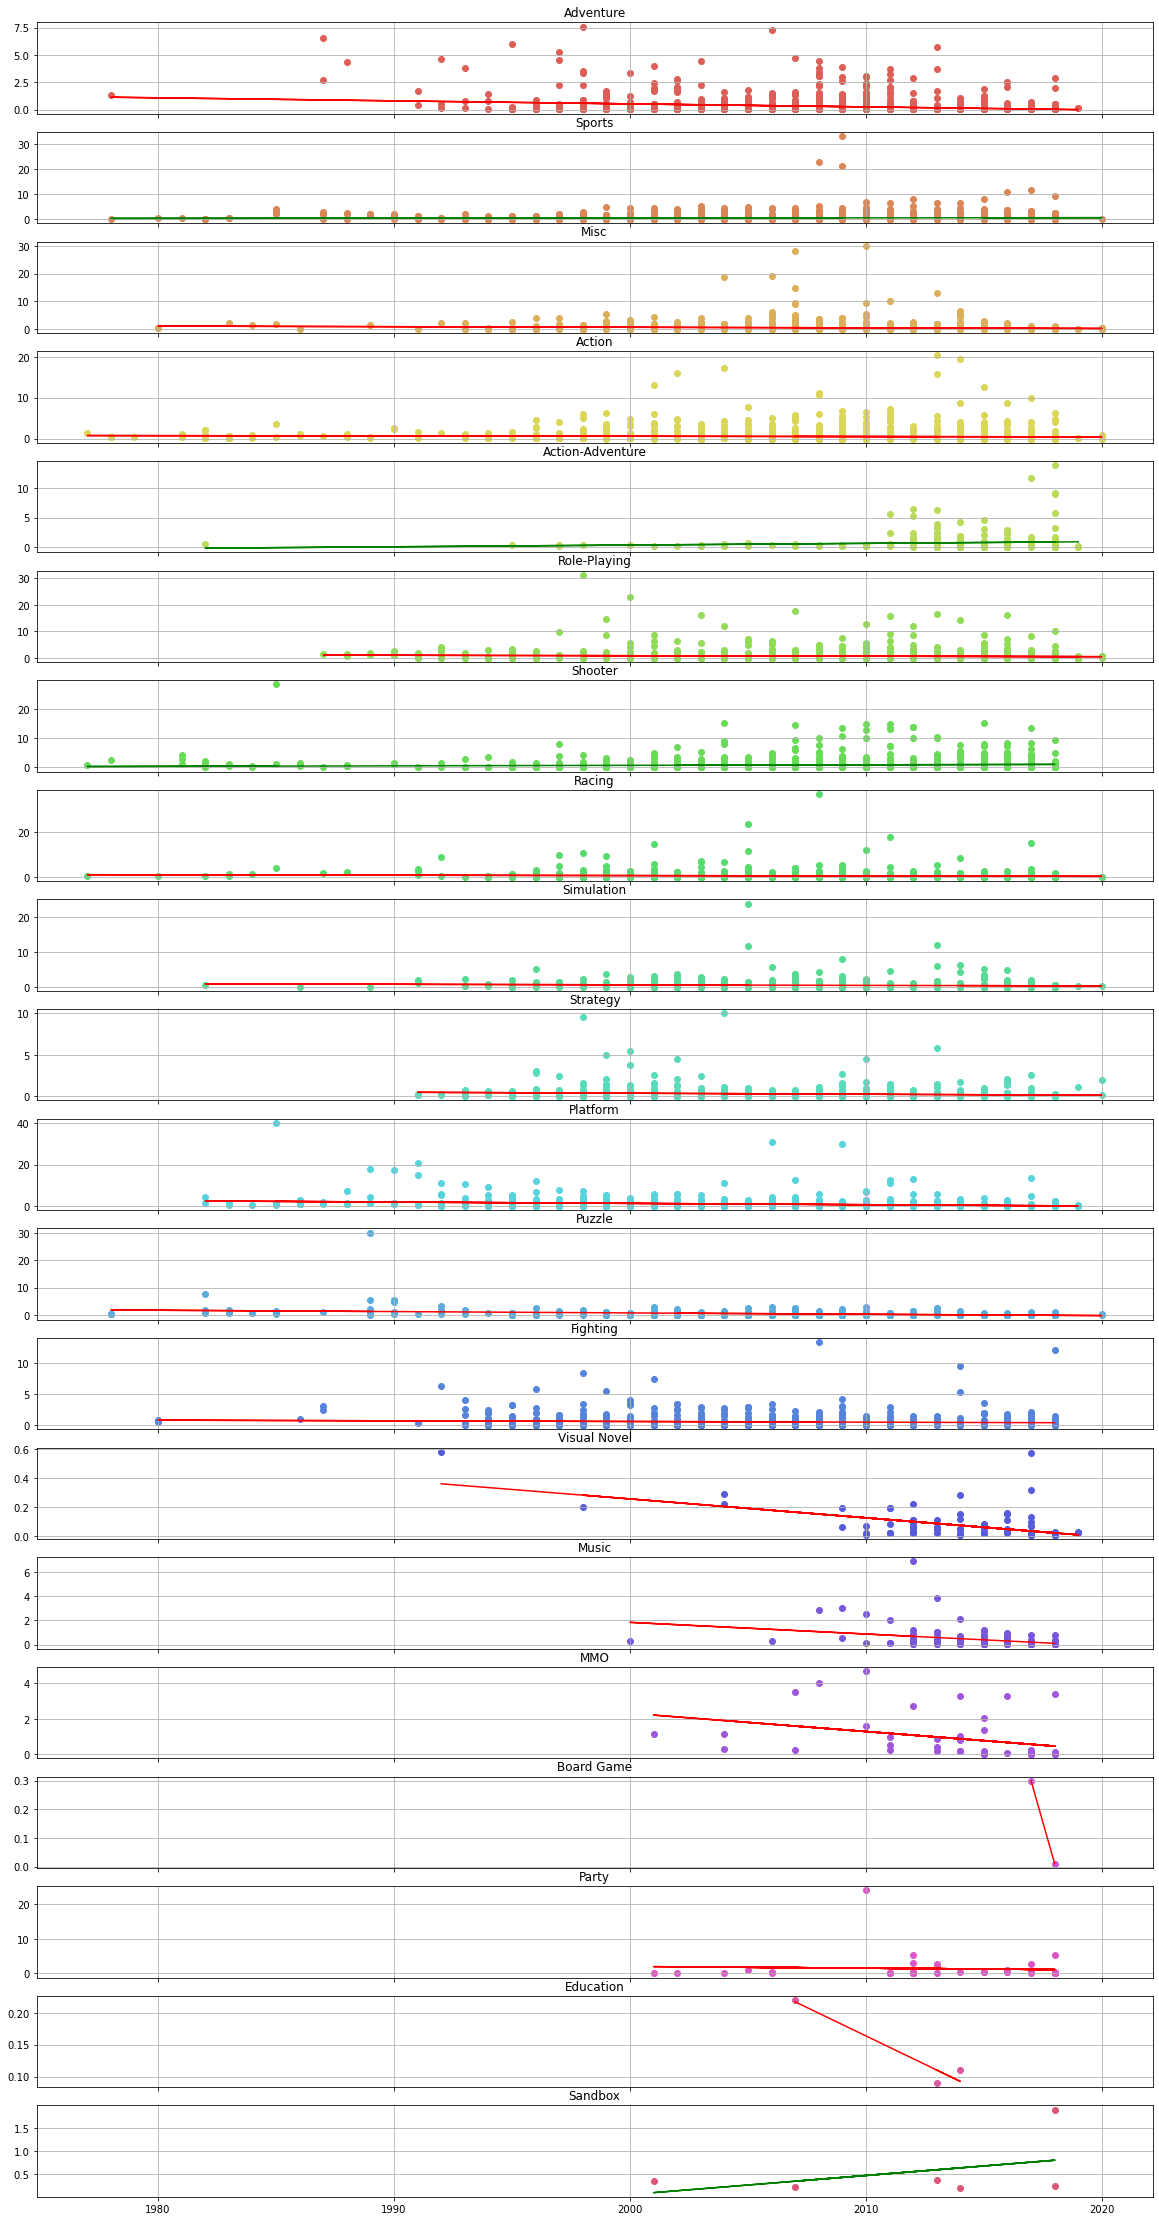

In [20]:
# function that lets you plot year vs sales for observations within the same categorical value of provided variable
def categorical_plot(var):
    
    # first, cleans data to prepare for plotting
    clean = year_df.dropna(subset=['Total_Sales', var])
    vals = clean[var].unique()
    colors = np.array(sns.color_palette("hls", len(vals)))
    fig, ax = plt.subplots(len(vals), figsize=(20, 40), sharex = True) 

    # for every unique value of that variable, create scatterplot, plot line of best fit
    for i in range(len(vals)):
        temp = clean[clean[var] == vals[i]]
        x = temp['Year']
        y = temp['Total_Sales'].to_numpy()
        ax[i].scatter(x, y).set_color(colors[i])
        ax[i].set_title(vals[i])
        ax[i].grid()
    
        m, b = np.polyfit(x, y, 1) 
        c = "r"
        if (m>0):
            c = "g"
        ax[i].plot(x, m*x + b, color=c)

# plots year vs sale for each genre
print("Genre")
categorical_plot("Genre")

ESRB_Rating


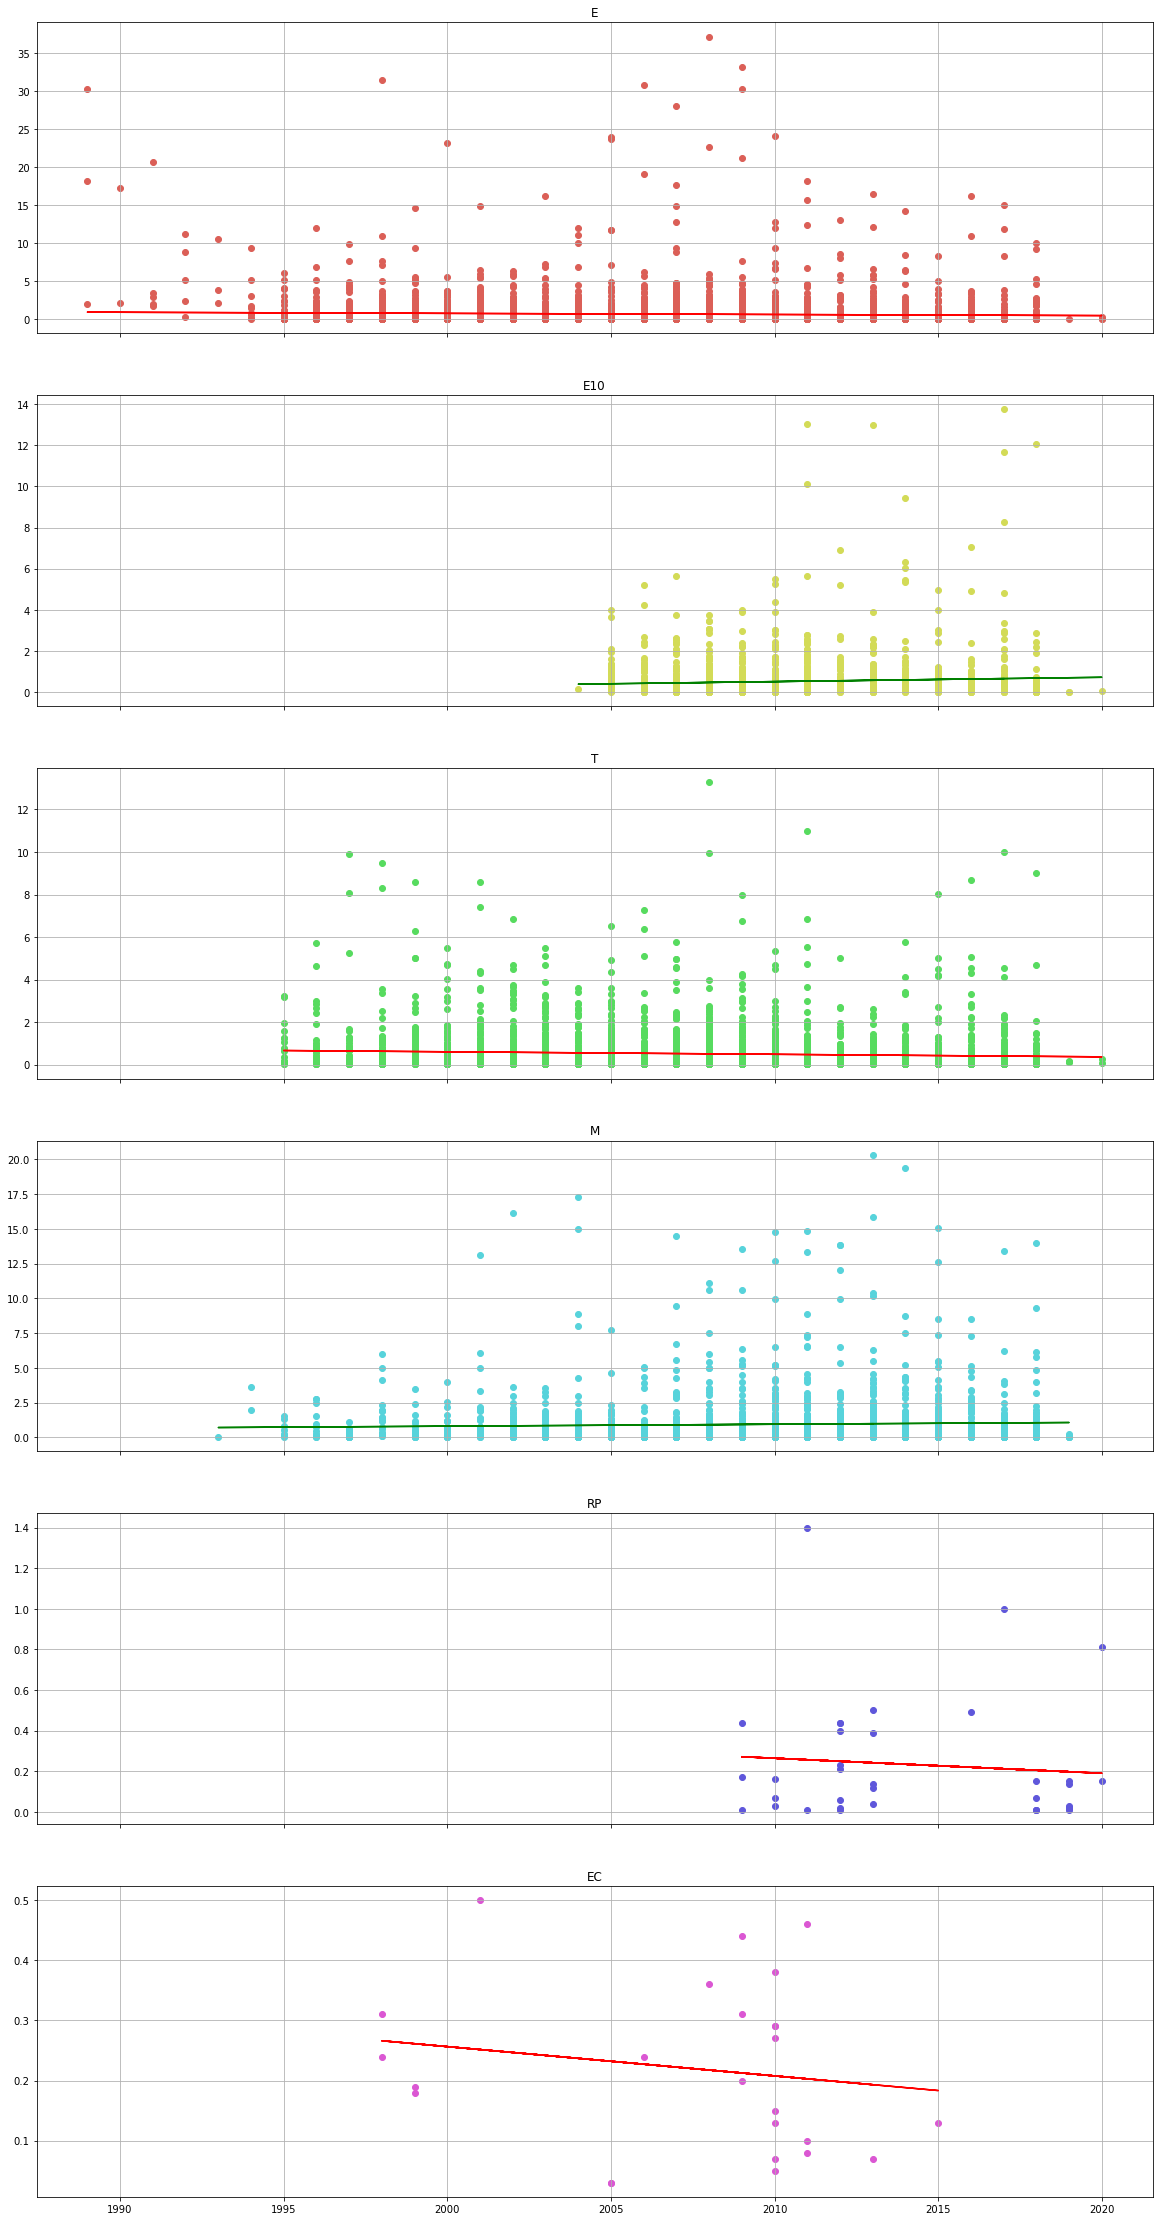

In [21]:
# plots year vs sale for each esrb
print("ESRB_Rating")
categorical_plot("ESRB_Rating")

Country


<ipython-input-22-82d2403e5ea9>:3: RankWarning: Polyfit may be poorly conditioned
  categorical_plot("Country")
<ipython-input-22-82d2403e5ea9>:3: RankWarning: Polyfit may be poorly conditioned
  categorical_plot("Country")
<ipython-input-22-82d2403e5ea9>:3: RankWarning: Polyfit may be poorly conditioned
  categorical_plot("Country")
<ipython-input-22-82d2403e5ea9>:3: RankWarning: Polyfit may be poorly conditioned
  categorical_plot("Country")


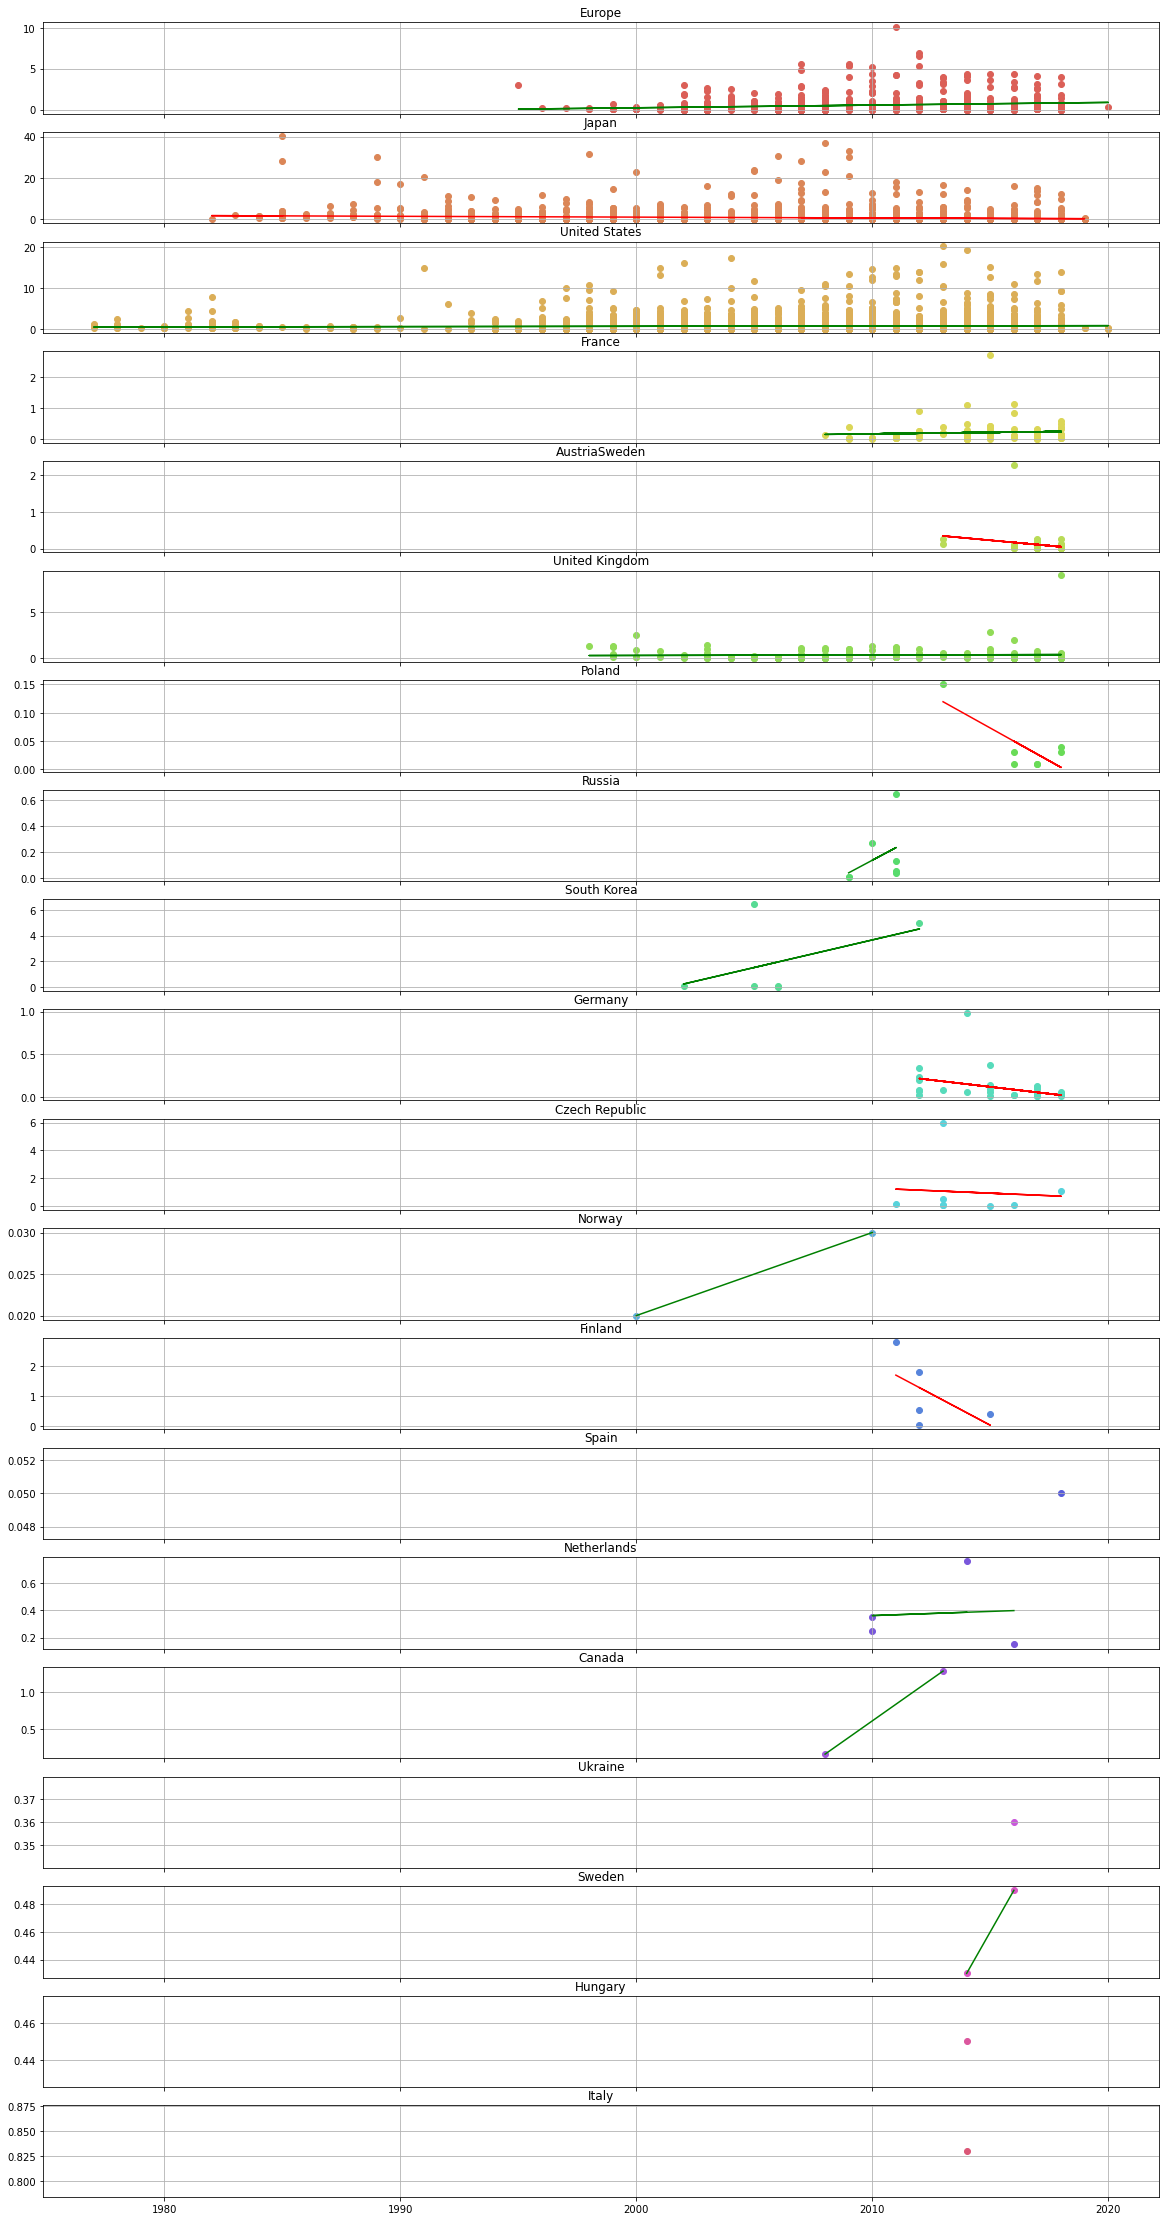

In [22]:
# plots year vs sale for each country of origin
print("Country")
categorical_plot("Country")

## Hypothesis Testing and Machine Learning
At this point, we have explored the data to reveal some of the relationships between different variables. But, we still want to be able to construct a model of how good a game will sell. One the strongest continuous variable that affects the sales of a game is, of course, the year. We can first try to fit a Linear Regression model of video game sales over the years. For this, we will be using a new module called Sci-Kit Learn. Note that we are not going to split the data because we want to take the entire dataset into account. Given the spread of the data, we do not need to worry about overfitting a linear regression model.

In [23]:
# import necessary modules
import sklearn
from sklearn.linear_model import LinearRegression

# fit the linear regression model
X = year_df["Year"].to_frame()
y = year_df["Total_Sales"]
reg = LinearRegression().fit(X, y)
print("y = ", reg.coef_[0], "x + ", reg.intercept_)

y =  -0.01563563202593023 x +  31.917034259690457


As you can see, we have come up with a simple y=mx+b model. According to our newly generated model, the sales for a game generally decrease by about 16 thousand USD after each year. This makes sense because the time a game gets released is when there is the most hype for a game. Games may update and introduce new content during its lifetime, but eventually the hype will fade at some point, resulting in an overall decline in sales. We can plot this model on top of our data so we can see how well it fits.

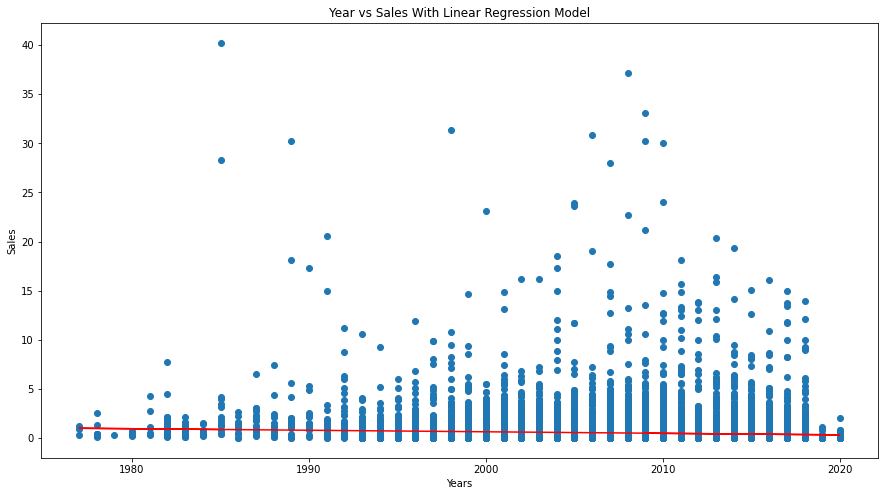

In [24]:
# predicts sales based off of year and stores predictions in seperate column
resids = year_df[['Year', 'Total_Sales']].copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg.predict(resids['Year'].to_frame())
X = resids['Year']
Y = resids['Total_Sales']
P = resids['Predicted']

# plot the data and the model
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales With Linear Regression Model")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X,Y)
plt.plot(X, P, color='r')

As you can see, this plot looks almost identical to the earlier plot involving year and sales. The bad news is, our model looks like it is going to have a lot of residuals, especially above the line. We can still plot out the residuals just to be sure. Since each year has its own distribution of sales, we can even create a violin plot of residuals.

<AxesSubplot:title={'center':'Residual Game Sales per Year'}, xlabel='Year', ylabel='Residuals'>

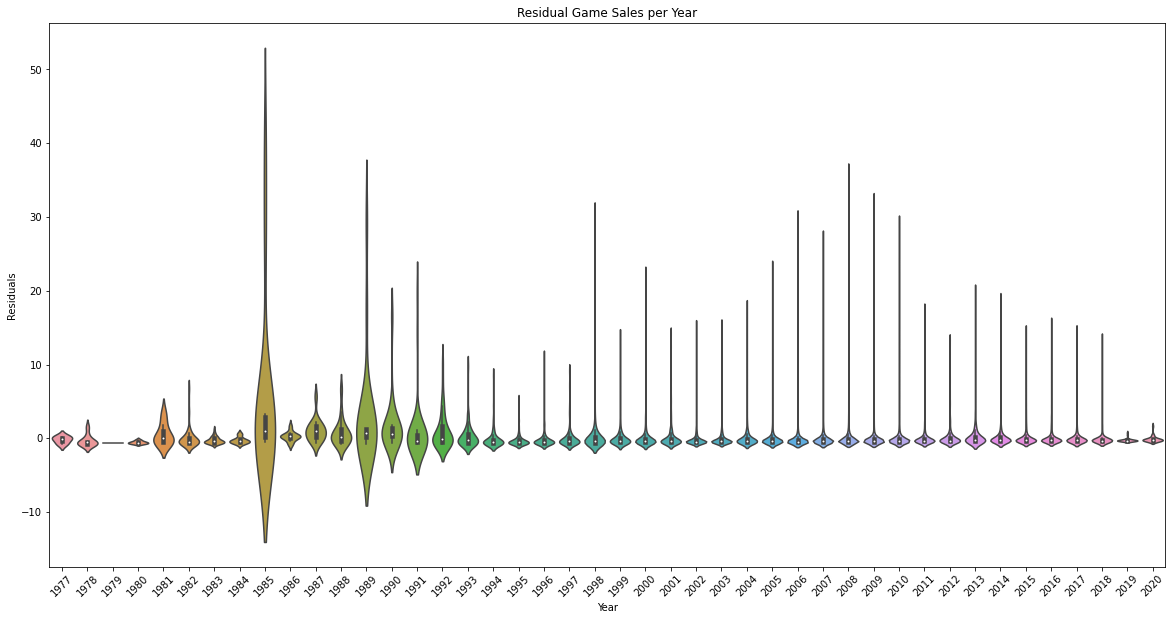

In [25]:
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

Just as previously predicted, our residual plot looks terrible. We have too many residuals above the linear model, resulting in a general pattern of residual distributions being skewed right for each year. At the very least, we seem to have uni-modal distributions across all years. We also have certain years with more symmetric looking distributions, such as the year 1986 and 1980. But, this is still unsatisfactory as there seems to be no constant variance of residuals. Therefore, the next step we can take is to add features and interactions to our linear regression model. We can try adding interactions for the country the game originated from, the ESRB rating of the game, and the genre of the game.

As you may have noticed, some of the plots above show that the general linear trend of the data for each ESRB, genre, and country value share the same pattern as the overall data: right-skewed, non-normal, unsymmetric, and uneven varianced distributions for each year. However, because some of the plots for a few of the categorical values actually seem promising, I would still like to try adding these values as interaction terms just to see if it makes anything better.

In [26]:
# setting up the dataframes
clean = year_df.dropna(subset=["Total_Sales", "Year", "Genre", "ESRB_Rating", "Country"])
interaction = clean[["Total_Sales", "Year"]].copy()

# gets dummy columns for each categorical value
genre_int = pd.get_dummies(clean["Genre"])
esrb_int = pd.get_dummies(clean["ESRB_Rating"])
country_int = pd.get_dummies(clean["Country"])

# deletes last column to avoid dummy variable trap, but saves deleted value for later
deleted_genre = list(genre_int)[-1]
deleted_esrb = list(esrb_int)[-1]
deleted_country = list(country_int)[-1]
genre_int = genre_int.iloc[:, :-1]
esrb_int = esrb_int.iloc[:, :-1]
country_int = country_int.iloc[:, :-1]

# concatenates the dataframes
interaction = pd.concat([interaction, genre_int, esrb_int, country_int], axis=1)
columns = list(interaction)[2:]

# for every new dummy feature, add interaction term for the year
for col in columns:
    interaction["Year*" + col] = interaction["Year"] * interaction[col]

# fits a new linear regression model on the data with interaction terms
X = interaction.iloc[:, 1:].values
y = interaction.iloc[:, 0].values
reg = LinearRegression().fit(X, y)

print("Regression Coefficients:", reg.coef_, "\nConstant:", reg.intercept_, "\nNumber of parameters:", len(reg.coef_) + 1)

Regression Coefficients: [ 2.16366528e-01  4.45577149e+02  4.14520375e+02  5.05960429e+02
  2.93220761e-08  2.88426269e-07  4.16409291e+02  8.54266540e+02
  4.90666368e+02  8.53502964e+02  4.16683729e+02  5.81683113e+02
  6.17367485e+02  4.55351863e+02  4.42140857e+02  3.37567506e+02
  4.64297630e+02  3.75704717e+02  4.74341086e+02 -3.63420901e+01
 -1.07573762e+02  2.90826345e+01 -6.84030914e+01 -2.60547720e+01
  7.04908546e+01 -1.46387848e-07 -4.77194353e+02 -5.52965770e+01
  5.49591632e+03  1.44916821e+02  1.24626506e+02 -3.37712898e-08
  5.65284624e+01  1.04456801e-07  1.01519010e+02 -1.40983288e+03
 -1.22219314e+03 -8.31932810e+02  5.27992073e-08  4.53594344e+01
 -2.20423876e-01 -2.04948704e-01 -2.50571201e-01  1.89334267e-04
  4.88498979e-04 -2.05779730e-01 -4.23188180e-01 -2.42887710e-01
 -4.22930736e-01 -2.05944738e-01 -2.88092759e-01 -3.06200269e-01
 -2.25228824e-01 -2.18561288e-01 -1.66448478e-01 -2.29746051e-01
 -1.85604316e-01 -2.34836417e-01  1.82532506e-02  5.35696925e-02


Alright, after sucessfully fitting our new model, we can now test the residuals of it. Before we do that, let's first take a look at the the model's parameters to try to see if any of these coefficients are significantly far from zero. This way we can tell if any of these interactions we have added really make a difference. To do this, we will conduct a t-test on the set of parameters. Note that we are going to be using a two-tailed significance level of 0.05 since we want most things to be "close" to zero.

In [27]:
# first, calculate the standard deviation of the set's difference to zero (itself)
params = np.append(reg.coef_, reg.intercept_)
sx = np.std(params)

# then, since we have 80 parameters, our degrees of freedom = 79
# so, with our 0.05 significance level, our t value is +-1.6644 since we are conducting a two-tailed test
tdist = 1.6644

# now, we go through each value and see how far they are
counter = 0
for param in params:
    t = np.absolute(param / (sx / np.sqrt(80)))
    if t >= tdist or t <= -tdist:
        counter+=1
        
print("Number of parameters significantly different from zero:", counter)

Number of parameters significantly different from zero: 23


It seems that a small portion of the parameters are actually significantly different from zero. This means that some of our interactions may have a big effect on what the model might predict. Let's now test our model to see how the total sales will change each year depending on what kind of game it is. Here, we will calculate the average yearly change in total sales for a game in every genre, country, and esrb combination using dummy game values so we can get a good picture. Since there are too many differenc combinations between each category possible, we will only look at American games that are rated T for Teen.

In [28]:
num_genre_cols = len(list(genre_int))
num_esrb_cols = len(list(esrb_int))
num_country_cols = len(list(country_int))
sum_cols = num_genre_cols + num_esrb_cols + num_country_cols

# iterates through each genre type (must include ommited column)
for genre in range(num_genre_cols + 1):
    genre_encoding = [0] * num_genre_cols
    
    # places a one at corresponding column to encode genre, or nowhere to signify ommited type
    if genre < num_genre_cols:
        genre_encoding[genre] = 1
        genre_str = list(genre_int)[genre]
    else:
        genre_str = deleted_genre
    
    # fixed the esrb and country encodings to T for Teen and USA
    # comment this part out if you want to calculate average change for all combinations
    esrb_encoding = [0] * num_esrb_cols
    country_encoding = [0] * num_country_cols
        
    # finally calculates the average yearly change in total sales for this combination
    # comment this part out if you want to calculate average change for all combinations
    x = [0] + genre_encoding + esrb_encoding + country_encoding + ([0] * sum_cols)
    x_prime = [1] + ((genre_encoding + esrb_encoding + country_encoding) * 2)
    avg_change = reg.predict([x_prime])[0] - reg.predict([x])[0]
    
    # comment this print statement out if you only want to see average change for all combinations
    print("Average yearly change in sales for a T-Rated, American", genre_str, "game is", avg_change, "million USD.")
    
# This code is commented out that allows you to calculate the average change of total sales for every combination.
# We couldn't do it here because the output would have been too huge.
#
#    # iterates through each esrb type (must include ommited column)
#    for esrb in range(num_esrb_cols + 1):
#        esrb_encoding = [0] * num_esrb_cols
#    
#        # places a one at corresponding column to encode esrb, or nowhere to signify ommited type
#        if esrb < num_esrb_cols:
#            esrb_encoding[esrb] = 1
#            esrb_str = list(esrb_int)[esrb]
#        else:
#            esrb_str = deleted_esrb
#        
#        # iterates through each country (must include ommited column)
#        for country in range(num_country_cols + 1):
#            country_encoding = [0] * num_country_cols
#    
#            # places a one at corresponding column to encode esrb, or nowhere to signify ommited type
#            if country < num_country_cols:
#                country_encoding[country] = 1
#                country_str = list(country_int)[country]
#            else:
#                country_str = deleted_country
#                
#            # finally calculates the average yearly change in total sales for this combination
#            x = [0] + genre_encoding + esrb_encoding + country_encoding + ([0] * sum_cols)
#            x_prime = [1] + ((genre_encoding + esrb_encoding + country_encoding) * 2)
#            avg_change = reg.predict([x_prime])[0] - reg.predict([x])[0]
#            
#            print("Average yearly change in total sales for a(n)", genre_str, "game from", country_str,\
#                  "with an ESRB rating of", esrb_str, "is", avg_change, "million USD.")

Average yearly change in sales for a T-Rated, American Action game is -0.004057347152013335 million USD.
Average yearly change in sales for a T-Rated, American Action-Adventure game is 0.011417824036414004 million USD.
Average yearly change in sales for a T-Rated, American Adventure game is -0.03420467211202549 million USD.
Average yearly change in sales for a T-Rated, American Board Game game is 0.21655586273385552 million USD.
Average yearly change in sales for a T-Rated, American Education game is 0.21685502744537644 million USD.
Average yearly change in sales for a T-Rated, American Fighting game is 0.010586798285771692 million USD.
Average yearly change in sales for a T-Rated, American MMO game is -0.2068216518975987 million USD.
Average yearly change in sales for a T-Rated, American Misc game is -0.026521181639225233 million USD.
Average yearly change in sales for a T-Rated, American Music game is -0.20656420757472915 million USD.
Average yearly change in sales for a T-Rated, Ame

From our results, it seems that within all the American T-Rated games, the genres that seem to increase the most in sales are Board Games and Education Games. On the other hand, the genres that seem to decrease the most in sales within the same scope are MMO and Music Games. However, these calculations won't really mean anything if the residuals are still terrible. First, let's observe the data once more with our new model plotted on top just so we can see what it looks like.

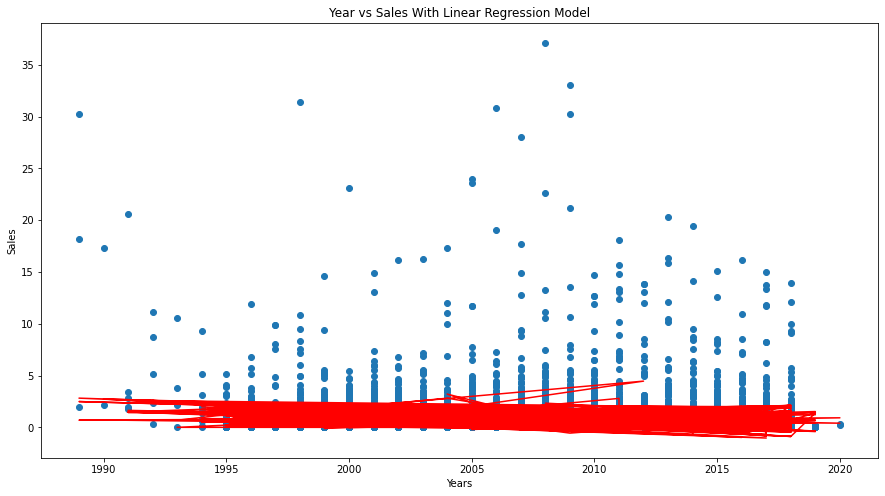

In [29]:
# predicts sales based off of year and categorical values, stores in seperate column
resids = interaction.copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg.predict(resids.iloc[:, 1:])

X = resids['Year']
Y = resids['Total_Sales']
P = resids['Predicted']

# plot the data and the model
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales With Linear Regression Model")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X,Y)
plt.plot(X, P, color='r')

This model might look a bit weird at first glace, but we must remember that this model is no longer a singular straight line, and that it is now a model with various interactions of multiple vategorical variables. Different as it may seem, the model still looks to be around the same place as before. Therefore, we can pretty much guess that this model is not that much of an improvement from the previous one. But, let's look at our residuals just to be sure.

<AxesSubplot:title={'center':'Residual Game Sales per Year With Genre, Country, and ESRB Rating as Interaction Terms'}, xlabel='Year', ylabel='Residuals'>

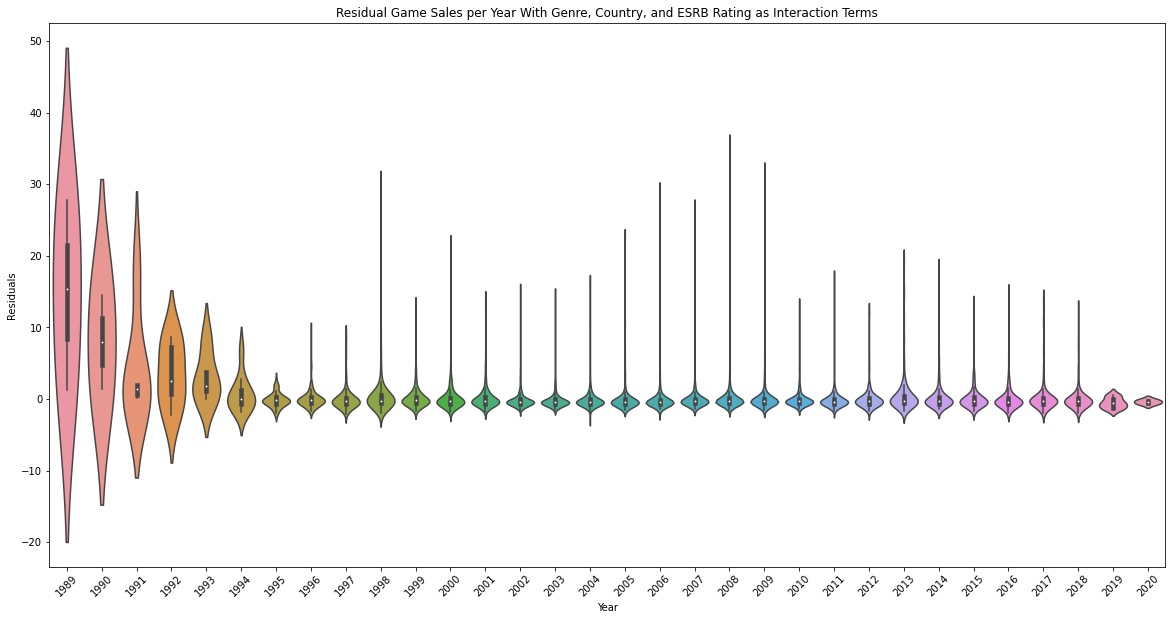

In [30]:
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year With Genre, Country, and ESRB Rating as Interaction Terms")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

As guessed, it seems that we do not have much improvement from our previous model. Our residuals are still heavily skewed right for a lot of our years past 1995. Although the distribution of residuals for each year after 1995 seem to be taking the same shape, there is still a lot of variance of spread amongst them as the skewedness for each year is still different. 

One thing we notice that is different from the previous residual plot is that the years at and before 1995 seems to take on a totally new shape. The residual distributions for these earlier years seem to be more spread out than before, with means larger than zero. It seems that this new model has underestimated a lot of the total sales of games that existed back then. There is a suspicion that this might be due to overfitting the model to the majority of the data without regard to how different the games from the earlier years did. Let's try only fitting the model on games that came out in 1996 or later.

<AxesSubplot:title={'center':'Residual Game Sales per Year Modeled With Interaction Terms and With Observations After 1996'}, xlabel='Year', ylabel='Residuals'>

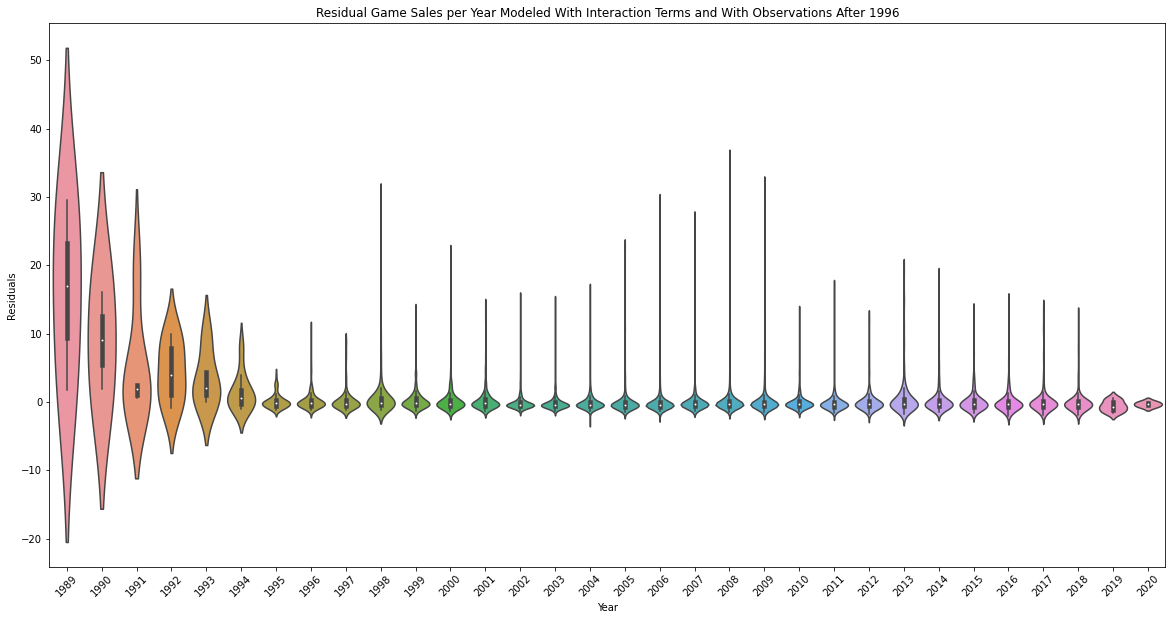

In [31]:
# fits a new model on the data with interaction terms but only for observations later than 1996
interaction_late = interaction[interaction["Year"] >= 1996]
X = interaction_late.iloc[:, 1:].values
y = interaction_late.iloc[:, 0].values
reg_late = LinearRegression().fit(X, y)

# predicts sales and calculates residuals, stores in seperate columns
resids = interaction.copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg_late.predict(resids.iloc[:, 1:])
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year Modeled With Interaction Terms and With Observations After 1996")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

Still, it seems that we get the same result. This new plot looks pretty much identical to the previous violin plot. Our suspected problem might not have been the real issue after all. It also makes sense why the plots turned out to be the same because, if you noticed from the scatter plot, there is not that much data on games before 1996. Therefore, ommiting the data before 1996 would not have influenced the model all that much. 

Nevertheless, our residuals are still as unevenly spread as before. This suggests that we might need a different kind of regression model instead of a linear one. Instead, we can definately try a Random Forest Regression. For this, we will be using the respective RandomForestRegressor module from Sci-Kit Learn. 

A Random Forest Regressor is a forest of multiple decisions trees that predict values based on decisions. Imagine each node as a decision you have to make based on your independent variable value. From there, you would have to pick a route to go on based on the decision you made, which leads to another node. A decision tree would make predictions by going through each node's decision, following the paths based on those decisions, until finally landing at a leaf node, which represents a prediction.

The problem is that a singular tree can often times be too brittle. If one were to make a decision tree model, one would have to figure out the decisions that have to be made first: the most important and significant decisions. For us to be able to figure out what the most significant decision is, we would have to maximize information gain. However, this will lead us to be prone to overfitting the model. Therefore, our solution to this is to use multiple trees. 

To make sure the trees in our random forest are not all equally brittle, we can use a certain subset of our data for each tree we make. Sci-Kit Learn has a way of not only doing this, but also allowing us to specify the maximum depth of each tree, the number of trees in our forest, and the number of samples we will allow for the making of each tree. For our purposes, we will be using the 5 trees and a maximum of 3000 samples for each tree. We will not be specifying the maximum depth of each tree simply because we want the leaf nodes to be pure values.

In [32]:
# import modules for our new approach
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# fits the data with a random forest regressor model, sets a random state parameter
forest = RandomForestRegressor(n_estimators=5, max_samples=3000, random_state=1)
X = interaction.iloc[:, 1:].values
y = interaction.iloc[:, 0].values
forest = forest.fit(X, Y)

Now that we have out Random Forest Regression model, we can plot each of our trees. Note that we will only be plotting the first two levels and the root node for simplicity. If we were to print out the entire tree, we would not be able to see the decisions that go on in each node.

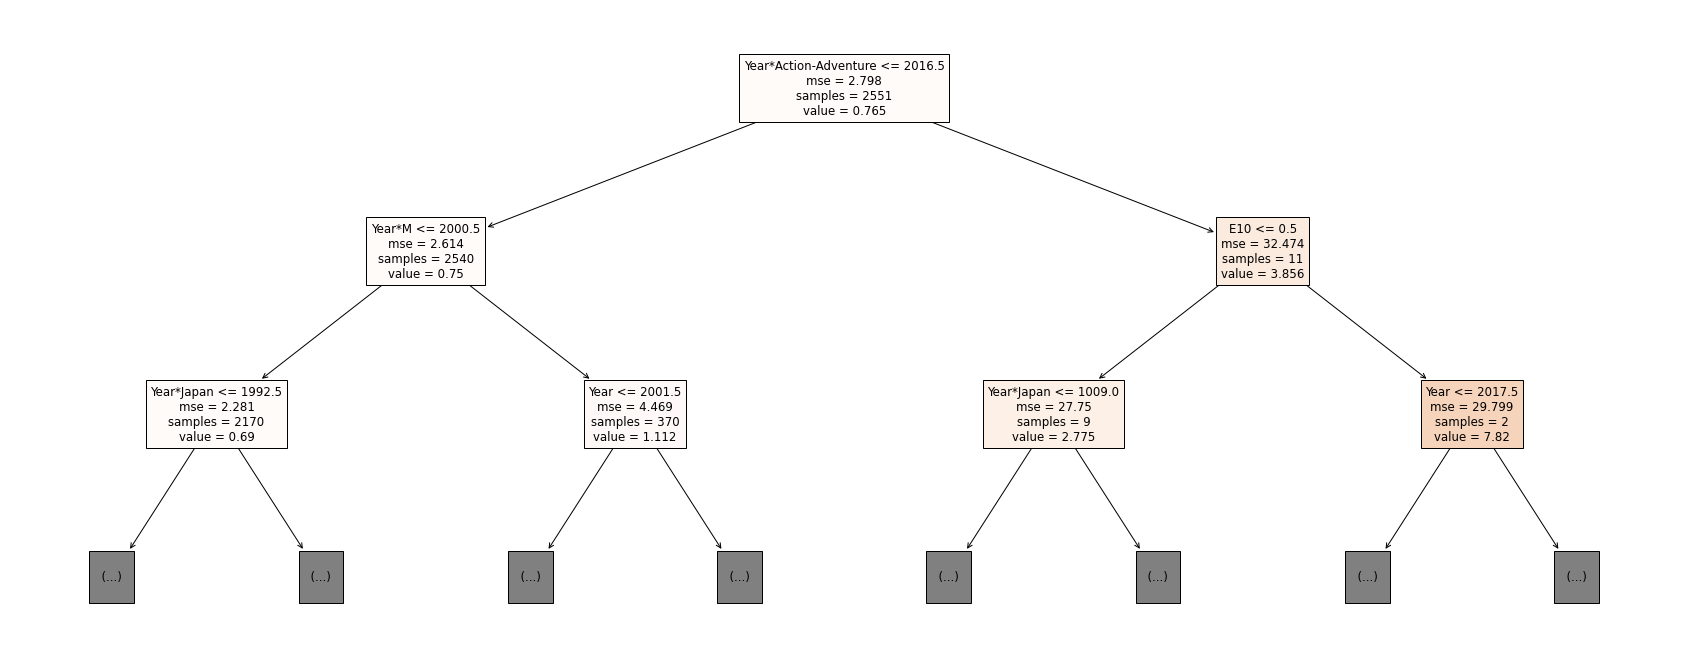

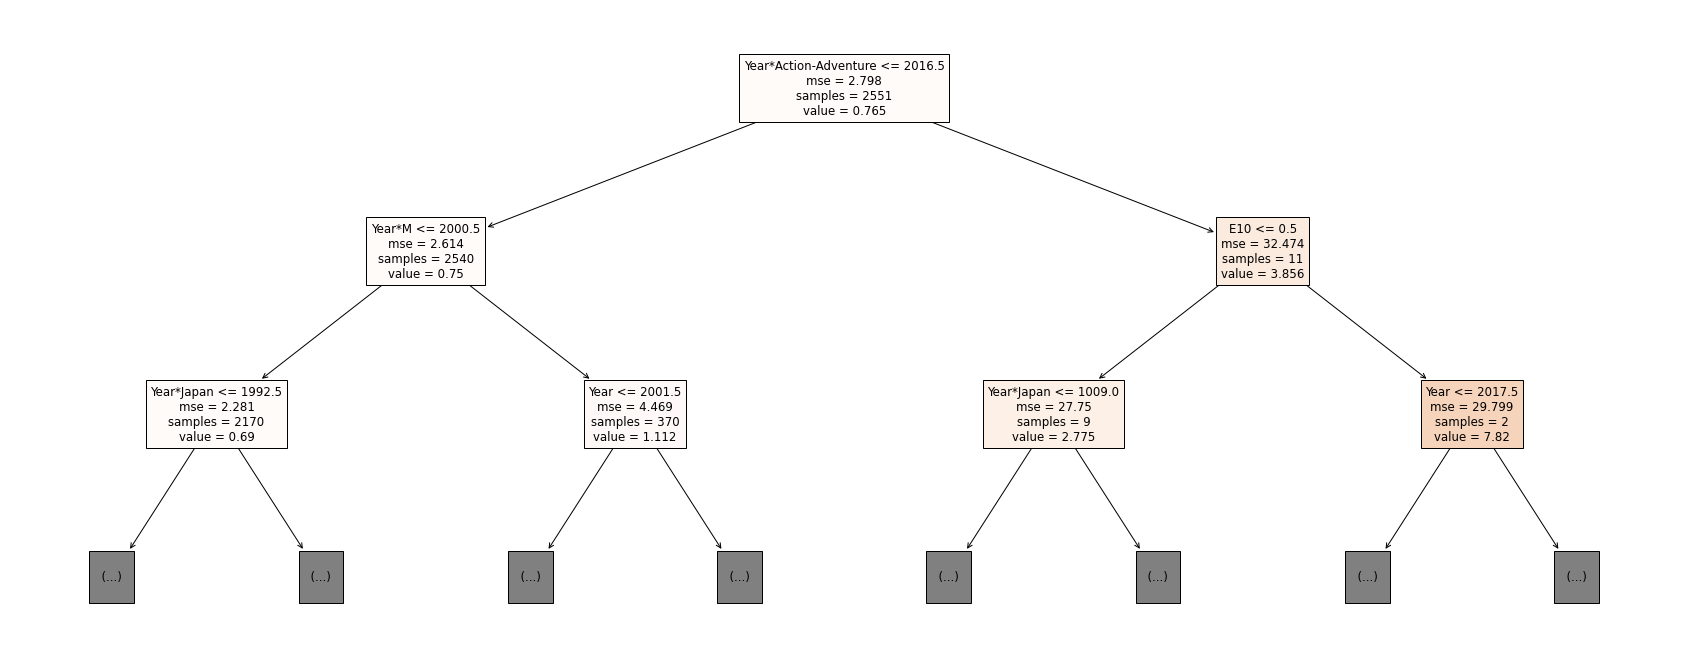

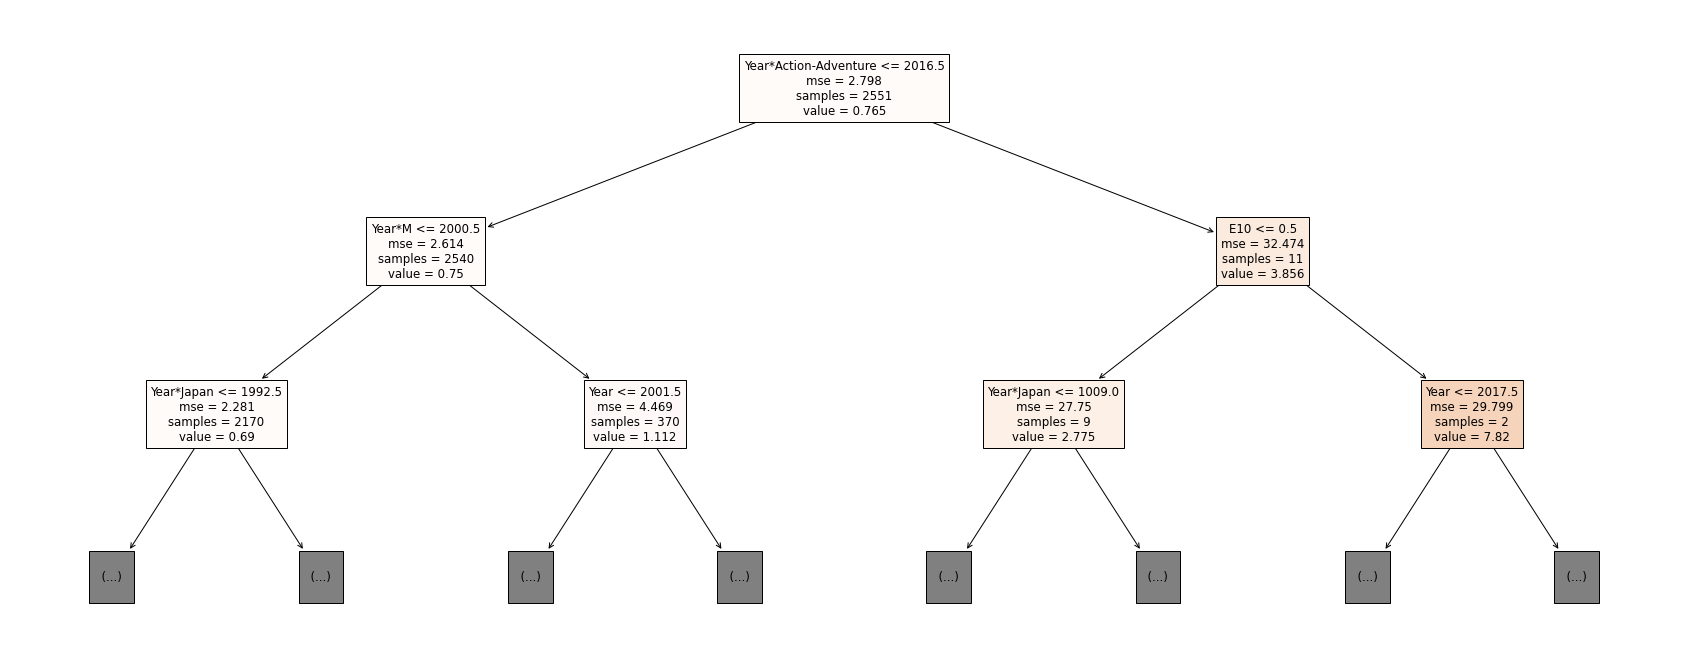

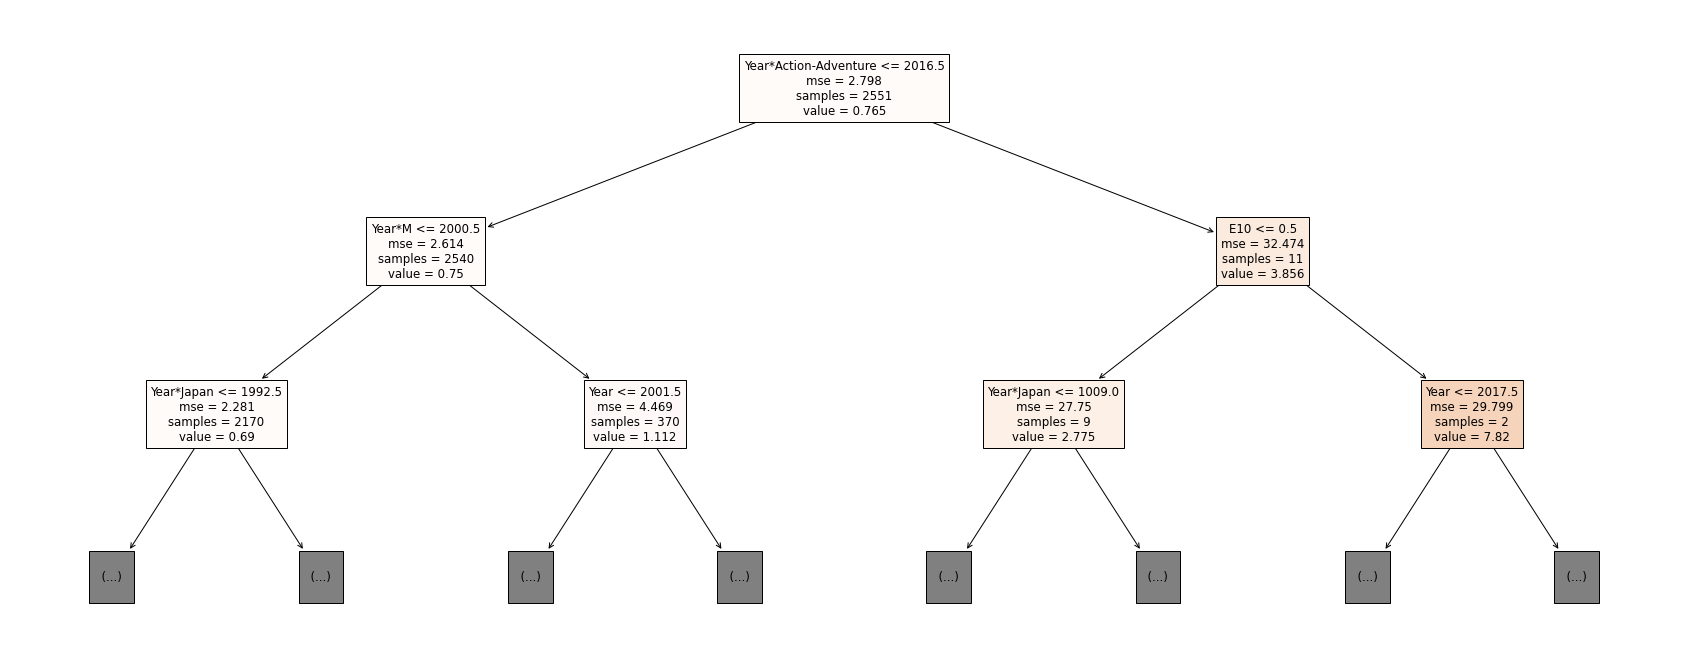

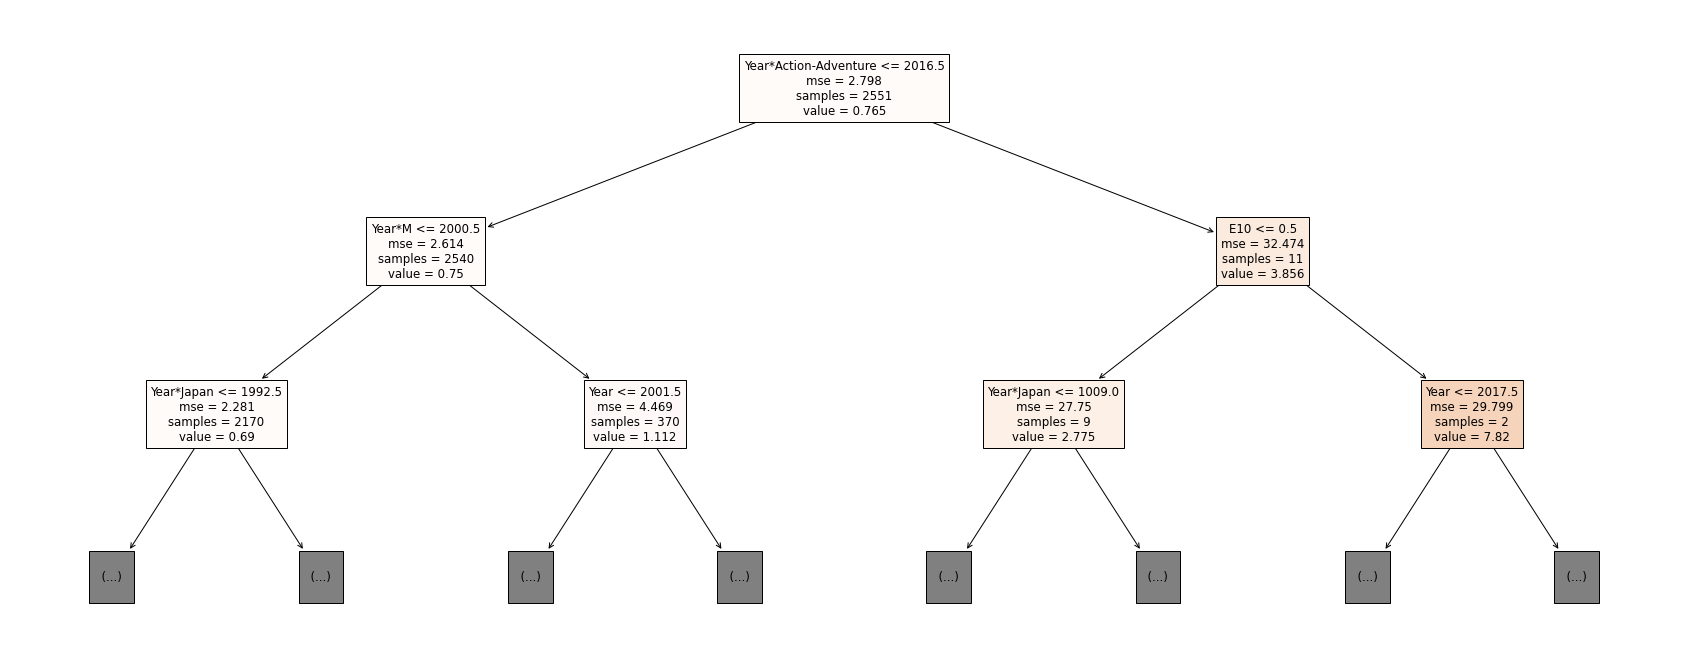

In [33]:
# plots the tree?
for tree_in_forest in forest.estimators_:
    fig, ax = plt.subplots(figsize=(30, 12))
    tree.plot_tree(forest.estimators_[0], feature_names=list(interaction.iloc[:, 1:]), filled=True, max_depth=2)
    plt.show()

Showing the upper levels of each tree in the forest gives us a clue of what the most significant decisions are for each tree. Based on the plots above, we can see that the year the game was published makes a big difference on which half of the tree you go, as evident in the root nodes of all the trees. Other important factors are the interaction term for whether or not the game is rated E for Everyone and whether or not the game is a Shooter, since nodes using these features as decisions fall right after the root node. 

Note that by default, if you were to create random forest models again and again, you would get a different forest with different trees and nodes each time. This is because the random forest regressor randomly decides which feature to use for each decision at each node. Of course, Sci-Kit Learn lets us control this by setting a random state. Hence, why we set a random state parameter when instantiating the random forest regressor.

Now, let's try predicting some values to see whether or not our predictions come close. Since this model is not plottable on a scatter plot, there is no way to plot the residuals for it. So instead of doing that, we will conduct a 10-fold cross validation procedure. This procedure begins by spliting the dataset into ten seperate subsets. It will then iterate through each subset, holding out the current subset, and using it as a test set for the model trained by all the other observations. It calculates the total error for each iteration, allowing us to see how far this model is off by.

As comparison, we will conduct the same procedure on our linear regression model with the same interaction terms and compare the errors we get against the errors from the random forest model. We will conduct another two-tailed t-test on the difference of the errors with a significance level of 0.05 since we want most differences to be "close" to zero.

In [34]:
from sklearn.model_selection import cross_val_score

# performs 10-fold cross-validation on the random forest and linear regressors
forest_score = cross_val_score(forest, X, y, cv=10)
linreg_score = cross_val_score(reg, X, y, cv=10)
print(forest_score, linreg_score)

# paired t-test comparing the random forest and linear regressors
# since we have 10 difference values, our degrees of freedom = 9
# so, with our 0.05 significance level, our t value is +-1.833 since we are conducting a two-tailed test
tdist = 1.8331
diff = np.subtract(linreg_score, forest_score)
xbar = np.mean(diff)
sx = np.std(diff)
t = xbar / (sx / np.sqrt(10))

if t >= tdist:
    print("On average, the linear regressor had significantly higher error than our random forest regressor.")
elif t <= -tdist:
    print("On average, the linear regressor had significantly lower error than our random forest regressor.")
else:
    print("On average, the linear regressor did not have significantly higher or lower error than our",\
          "random forest regressor.")

[-8.60477882e+03 -5.40747160e+03 -5.08302344e+03 -2.30031365e+03
 -1.82726047e+03 -6.98897588e+02 -3.44278827e+02 -5.67310528e+01
 -2.58173560e+01 -8.58403021e-01] [-8.42131114e+10 -4.13328382e+03 -3.06572229e+03 -1.38246996e+03
 -7.87894246e+02 -2.51862424e+02 -9.77466453e+01 -1.48491120e+01
 -8.42303665e+00 -8.71157992e-01]
On average, the linear regressor did not have significantly higher or lower error than our random forest regressor.


Sadly it appears that our random forest regression did not make too much of an improvement to our linear regression. Just as our t-test tells us, we do not have enough evidence to reject the null hypothesis that the mean difference between the errors of the regressors is not significantly high nor low.

## Conclusion
The task of predicting video game sales is actually harder then what one might suspect. It is especially hard to do within a single tutorial. However, we still tried to do it by looking closely at how the game's ESRB rating, country of origin, genre, and year of production might play into how good the game might do in sales. Through our exploratory data analysis we discovered a persistent pattern in the majority of our scatter plots, where certain games appear high above the rest of the observations in certain years. We even looked at various platforms to see which onese affected sales the most. We also tried to use two different machine learning regressors to try and predict sales using interaction terms between the variables mentioned above but came nowhere close to accurate.

The insights we achieved from this tutorial sheds light on the possibility that there are perhaps other variables that play a role into how well a game sells. Therefore, more data needs to be collected and more experimentation needs to be done so we can get closer to finding our what exactly makes a game sell. There are still questions that have not been answered by this tutorial whoes answers have yet to be discovered. Does the availibility of a game translate to more sales? If so, how can we measure availibility? 

If we did not have that many unreported critic scores, perhaps we could look into how the critic scores of each title correlates with the game's sales. We could also wonder what it is about a game that makes the critic scores go up if it happens to be strongly correlated with total sales. As you can see, we can already go on and on without end about the possible questions we might ask about the video game industry.

## Related Links
If you are interested in doing more Data Science on the topic of video game sales, you might find the following links useful.

**Video Game Data**
- Video Game Data from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019
- Video Game Region Data from Kaggle: https://www.kaggle.com/andreshg/videogamescompaniesregions

**Statistical Analysis**
- Seaborn Violin Plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html
- Matplotlib Violin Plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html

**Machine Learning**
- Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Random Forest Regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html